# Data Visualization

[Data Literacy](./index.html)

Daniel Winkler ([Institute for Retailing & Data
Science](https://www.wu.ac.at/retail/))

# Always Visualize!

## Processing numbers is hard

In [ ]:
library(datasauRus)
library(dplyr)
library(ggplot2)
library(gt)
library(stringr)
library(tidyr)

tab_ds_data <- datasaurus_dozen |>
  filter(dataset %in% c('dino', 'star')) |>
  group_by(dataset) |>
  mutate(id = 1:n()) |>
  pivot_wider(
    names_from = dataset, 
    values_from = c(x,y),
    names_vary = 'slowest'
  ) |>
  select(-id) |> 
  head(10) 
tab_ds_data |>  
  gt() |>
  cols_label(
    x_dino = 'x',
    y_dino = 'y',
    x_star = 'x',
    y_star = 'y'
  ) |>
  fmt_number() |>
  tab_spanner(
    label = "Dino",
    columns = ends_with("dino")
  ) |>
  cols_align('center') |> 
  tab_spanner(
    label = "Star",
    columns = ends_with("star")
  ) |> 
  tab_options(
    table.width = pct(85),
    table.font.size = 35) 

## Summary statistics are limiting

In [ ]:
datasaurus_dozen |>
  filter(dataset %in% c('dino', 'star')) |>
  group_by(dataset) |>
  summarize(
    avg_x = round(mean(x), digits = 2), 
    sd_x = round(sd(x), digits = 2),
    avg_y = round(mean(y), digits = 2),
    sd_y = round(sd(y), digits = 2),
    cor_xy = round(cor(x,y), digits = 2)
    ) |>
  mutate(dataset = str_to_title(dataset)) |> 
  gt() |>
  cols_label(
    avg_x = "Mean of x",
    sd_x = "Std. Dev. of x",
    avg_y = "Mean of y",
    sd_y = "Std. Dev. of y",
    cor_xy = "Correlation") |> 
  tab_options(
    table.width = pct(85),
    table.font.size = 35) 

``` r
datasaurus_dozen |>
  filter(dataset %in% c('dino', 'star')) |>
  mutate(dataset = str_to_title(dataset)) |>
  ggplot(aes(x = x, y = y)) +
  geom_point() +
  facet_wrap(~dataset) +
  theme_minimal() +
  theme(
    panel.grid=element_blank(),
    strip.text=element_text(size=35),
    axis.ticks=element_blank(),
    axis.text=element_blank(),
    axis.title=element_text(size=30)
  )
```

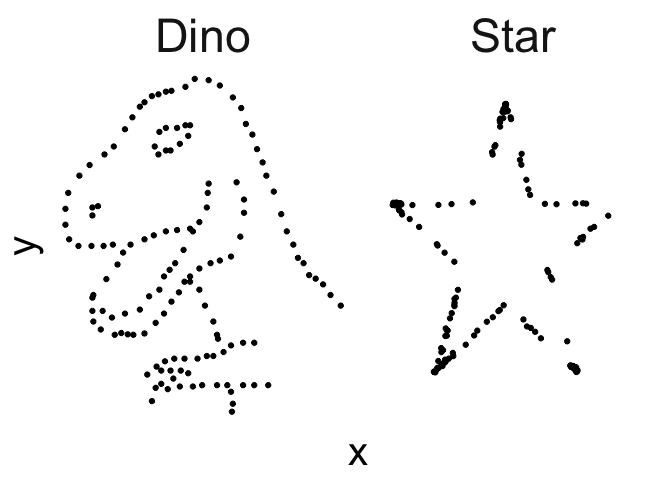

## Exercise

> **See beyond summary statistics**
>
> -   Select the `dataset`s `x_shape` & `bullseye` from the data.frame
>     `datasaurus_dozen`
> -   Create a table showing the following statistics for the two
>     `dataset`s:
>     -   mean of `x` and `y`,
>     -   standard deviation of `x` and `y`, and
>     -   covariance between `x` and `y`
> -   Create a plot showing the two `dataset`s

In [ ]:
library(datasauRus)
library(dplyr)
library(ggplot2)
library(gt)
library(stringr)
library(tidyr)
filter(datasaurus_dozen, dataset %in% c('x_shape', 'bullseye')) |>
  str(give.attr = FALSE)

tibble [284 × 3] (S3: tbl_df/tbl/data.frame)
 $ dataset: chr [1:284] "x_shape" "x_shape" "x_shape" "x_shape" ...
 $ x      : num [1:284] 38.3 35.8 32.8 33.7 37.2 ...
 $ y      : num [1:284] 92.5 94.1 88.5 88.6 83.7 ...

# Visual Channels

## Visualizing different magnitudes

-   We can express the comparison of numbers in multiple ways
-   Some representations can be interpreted (by humans) more accurately
-   According to Franconeri et al. (2021) from most to least accurate:
    -   Position
    -   Length
    -   Area
    -   Angle
    -   Intensity

## Visualizing “sameness”

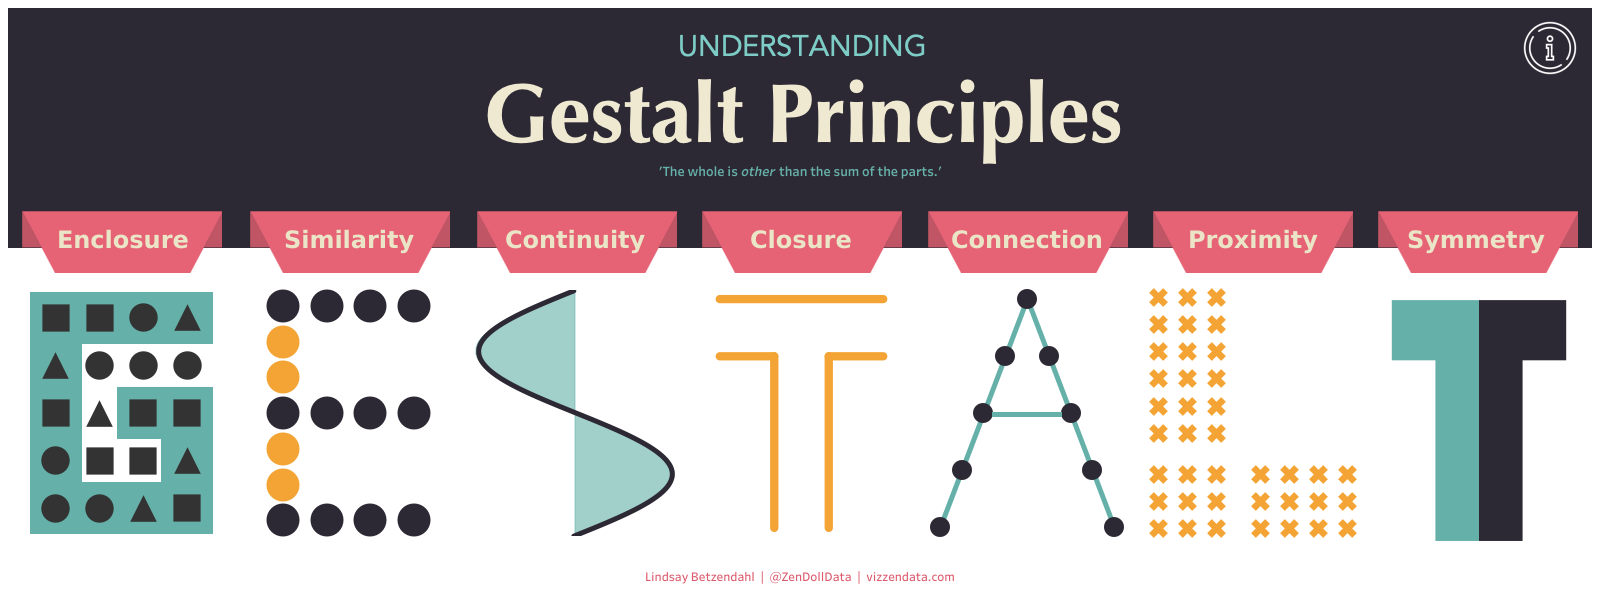

## Caution: these can create spurious interpretations

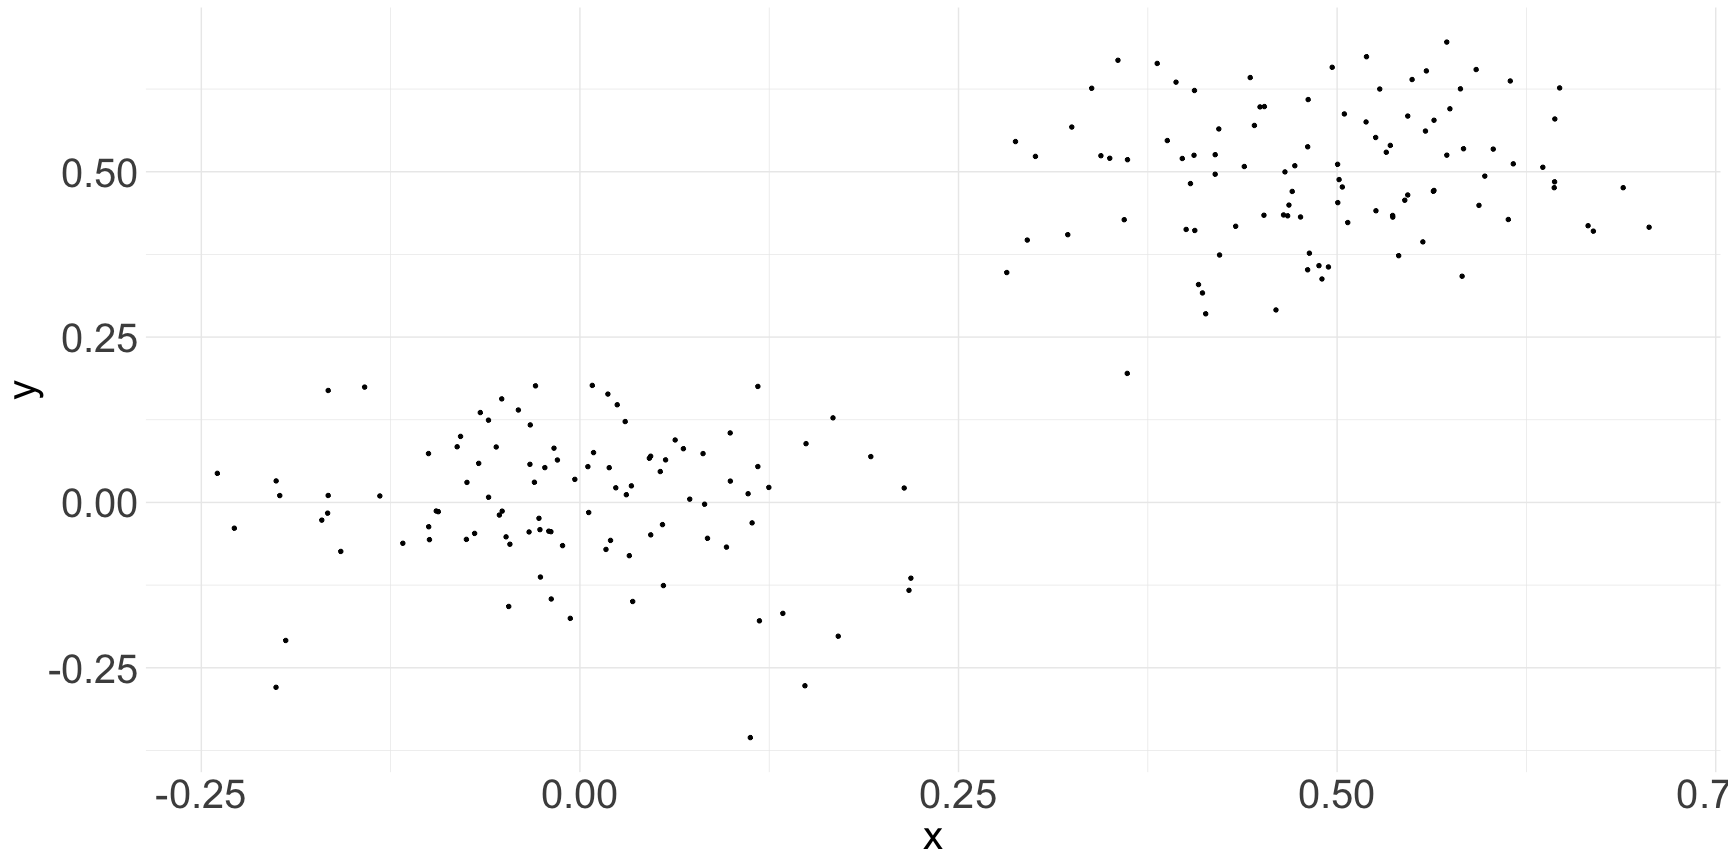

In [ ]:
related_data <- data.frame(
  x = c(rnorm(100, 0, 0.1), rnorm(100, 0.5, 0.1)), 
  y = c(rnorm(100, 0, 0.1), rnorm(100, 0.5, 0.1)))
ggplot(related_data, aes(x = x , y = y)) +
  geom_point(size = 1.2) +

  theme_minimal() +
  theme(
    plot.title=element_text(size=35),
    axis.ticks.x=element_blank(),
    axis.text=element_text(size=30),
    axis.title=element_text(size=30)
  )

## Counteract by using another principle

In [ ]:
related_data$g <- as.factor(ifelse(rbinom(200, 1, prob = 0.5) == 1, 'F', 'M'))
ggplot(related_data, aes(x = x , y = y, color = g, shape = g)) +
  geom_point(size = 4) +
  guides(colour = guide_legend(override.aes = list(size=7))) +
  theme_minimal() +
  theme(
    plot.title=element_text(size=35),
    axis.ticks.x=element_blank(),
    axis.text=element_text(size=30),
    axis.title=element_text(size=30),
    legend.title = element_blank(),
    legend.position = 'top',
    legend.text = element_text(size = 25)
  )

## Position is interpreted most accurately

-   Common y-axis alignment allows for accurate interpretation
-   Categories in the x-axis sorted by y-axis value
-   Position should encode the answer to the questions the audience asks

In [ ]:
library(palmerpenguins)
library(forcats)
fct_revfreq <- \(x) fct_rev(fct_infreq(x))
ggplot(penguins, aes(x = fct_revfreq(species))) +
  geom_bar(stat = "count") +
  scale_y_continuous(
    expand = expansion(c(0,0.05)),
    breaks = seq(10,150, by = 20)) + 
  labs(
    title = "Number of observations by species",
    x = "Penguin Species"
    ) +
  theme_bw() +
    theme(
    plot.title=element_text(size=35),
    legend.text=element_text(size=25),
    axis.ticks.x=element_blank(),
    axis.text=element_text(size=30),
    axis.title=element_text(size=30)
  )

## Lengths of unaligned segments are harder to compare

-   Are there more female Gentoo or female Adelie penguins?
-   Are there more male or female Gentoo penuins?

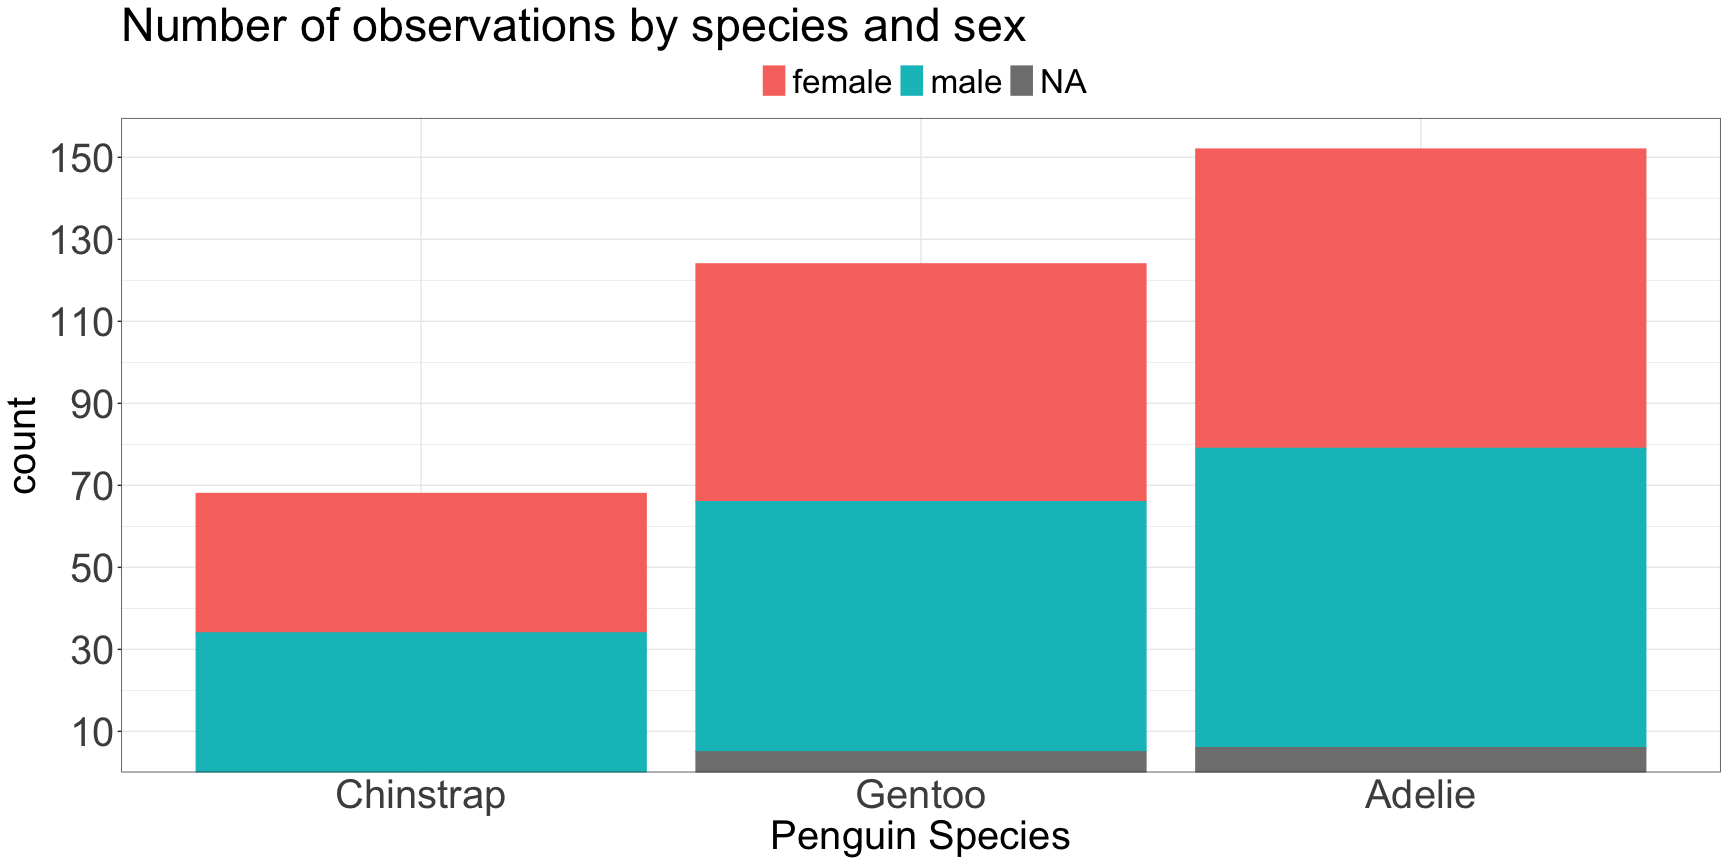

In [ ]:
ggplot(penguins, aes(x = fct_revfreq(species), color = sex, fill = sex)) +
  geom_bar(stat = "count") +
  scale_y_continuous(
    expand = expansion(c(0,0.05)),
    breaks = seq(10,150, by = 20)) + 
  labs(
    title = "Number of observations by species and sex",
    x = "Penguin Species"
    ) +
  theme_bw() +
    theme(
    plot.title=element_text(size=35),
    axis.ticks.x=element_blank(),
    axis.text=element_text(size=30),
    axis.title=element_text(size=30),
    legend.position='top',
    legend.text=element_text(size=25),
    legend.title=element_blank()
  )

## If the total number is not important but sub-group numbers are…

-   Are there more female Gentoo or female Adelie penguins?
-   Are there more male or female Gentoo penuins?

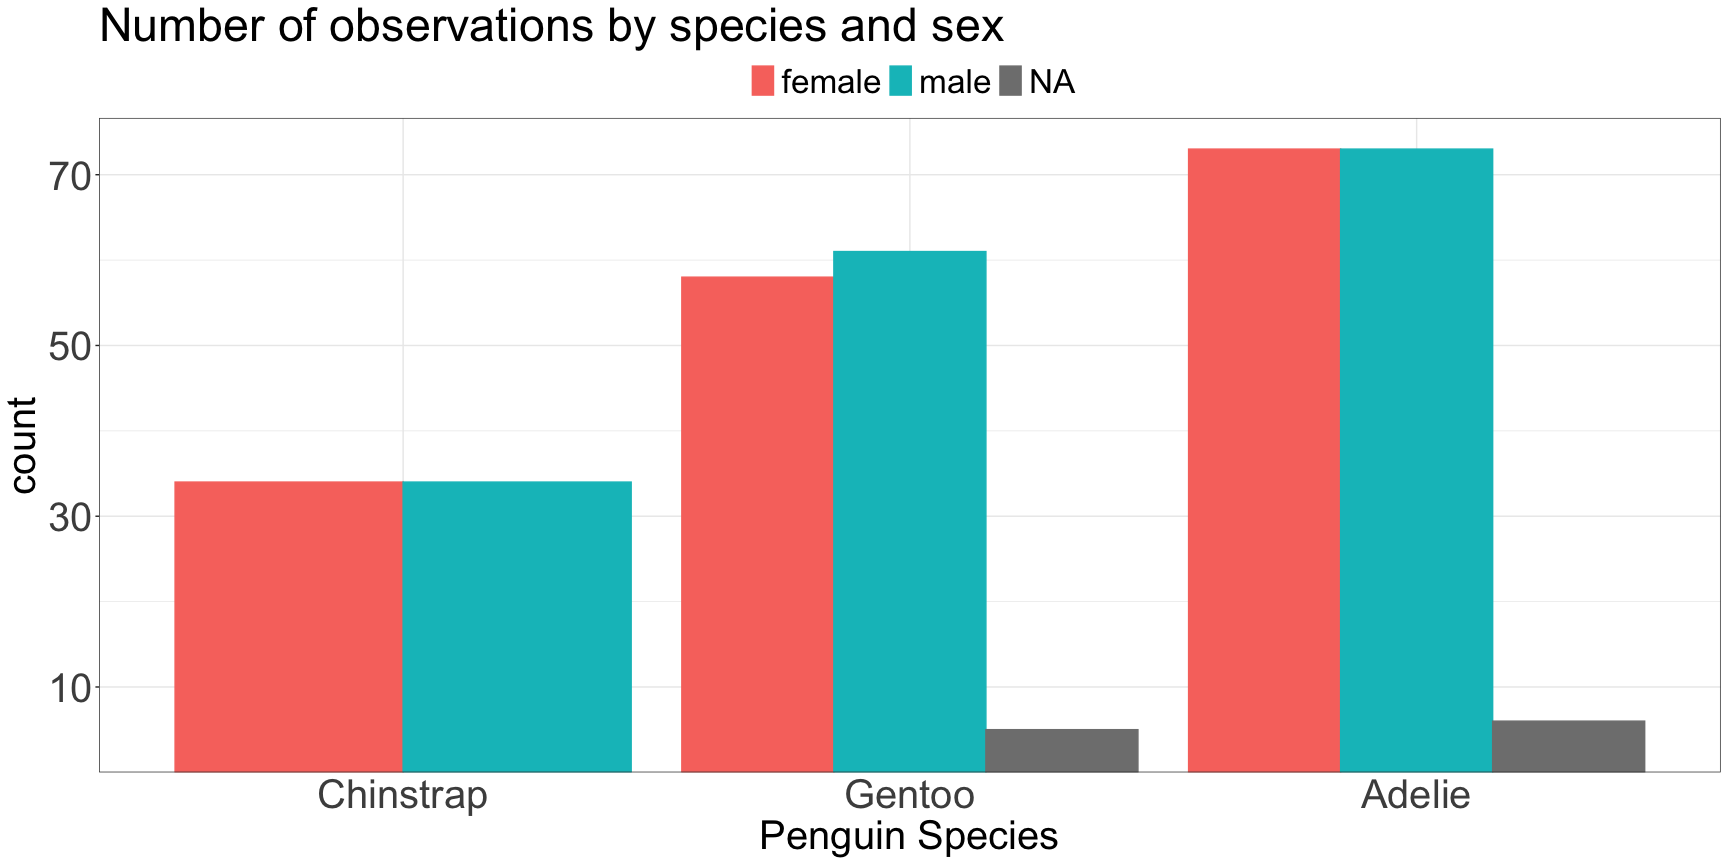

In [ ]:
ggplot(penguins, aes(x = fct_revfreq(species), color = sex, fill = sex)) +
  geom_bar(stat = "count", position = 'dodge') +
  scale_y_continuous(
    expand = expansion(c(0,0.05)),
    breaks = seq(10,150, by = 20)) + 
  labs(
    title = "Number of observations by species and sex",
    x = "Penguin Species"
    ) +
  theme_bw() +
    theme(
    plot.title=element_text(size=35),
    axis.ticks.x=element_blank(),
    axis.text=element_text(size=30),
    axis.title=element_text(size=30),
    legend.position='top',
    legend.text=element_text(size=25),
    legend.title=element_blank()
  )

## Using pre-attentive attributes

-   Action potentials are means of communication between neurons in the
    brain
-   The probability of firing depends on the strength of the stimulus
-   The strength of the stimulus is relative to the background
-   All or nothing process
    -   Once the threshold is exceeded the neuron fires
-   Takeaway for visualization:
    -   **Most important information needs to be “highlighted” relativ
        to all other information**

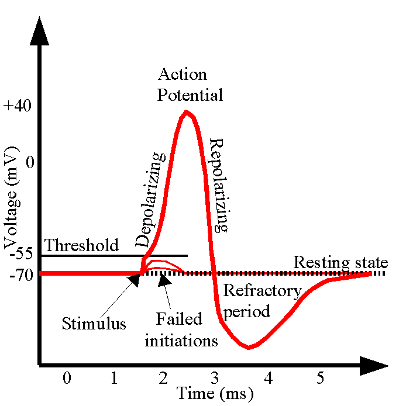

## How many “b”s are there?

-   top-down attention: deliberate & slow

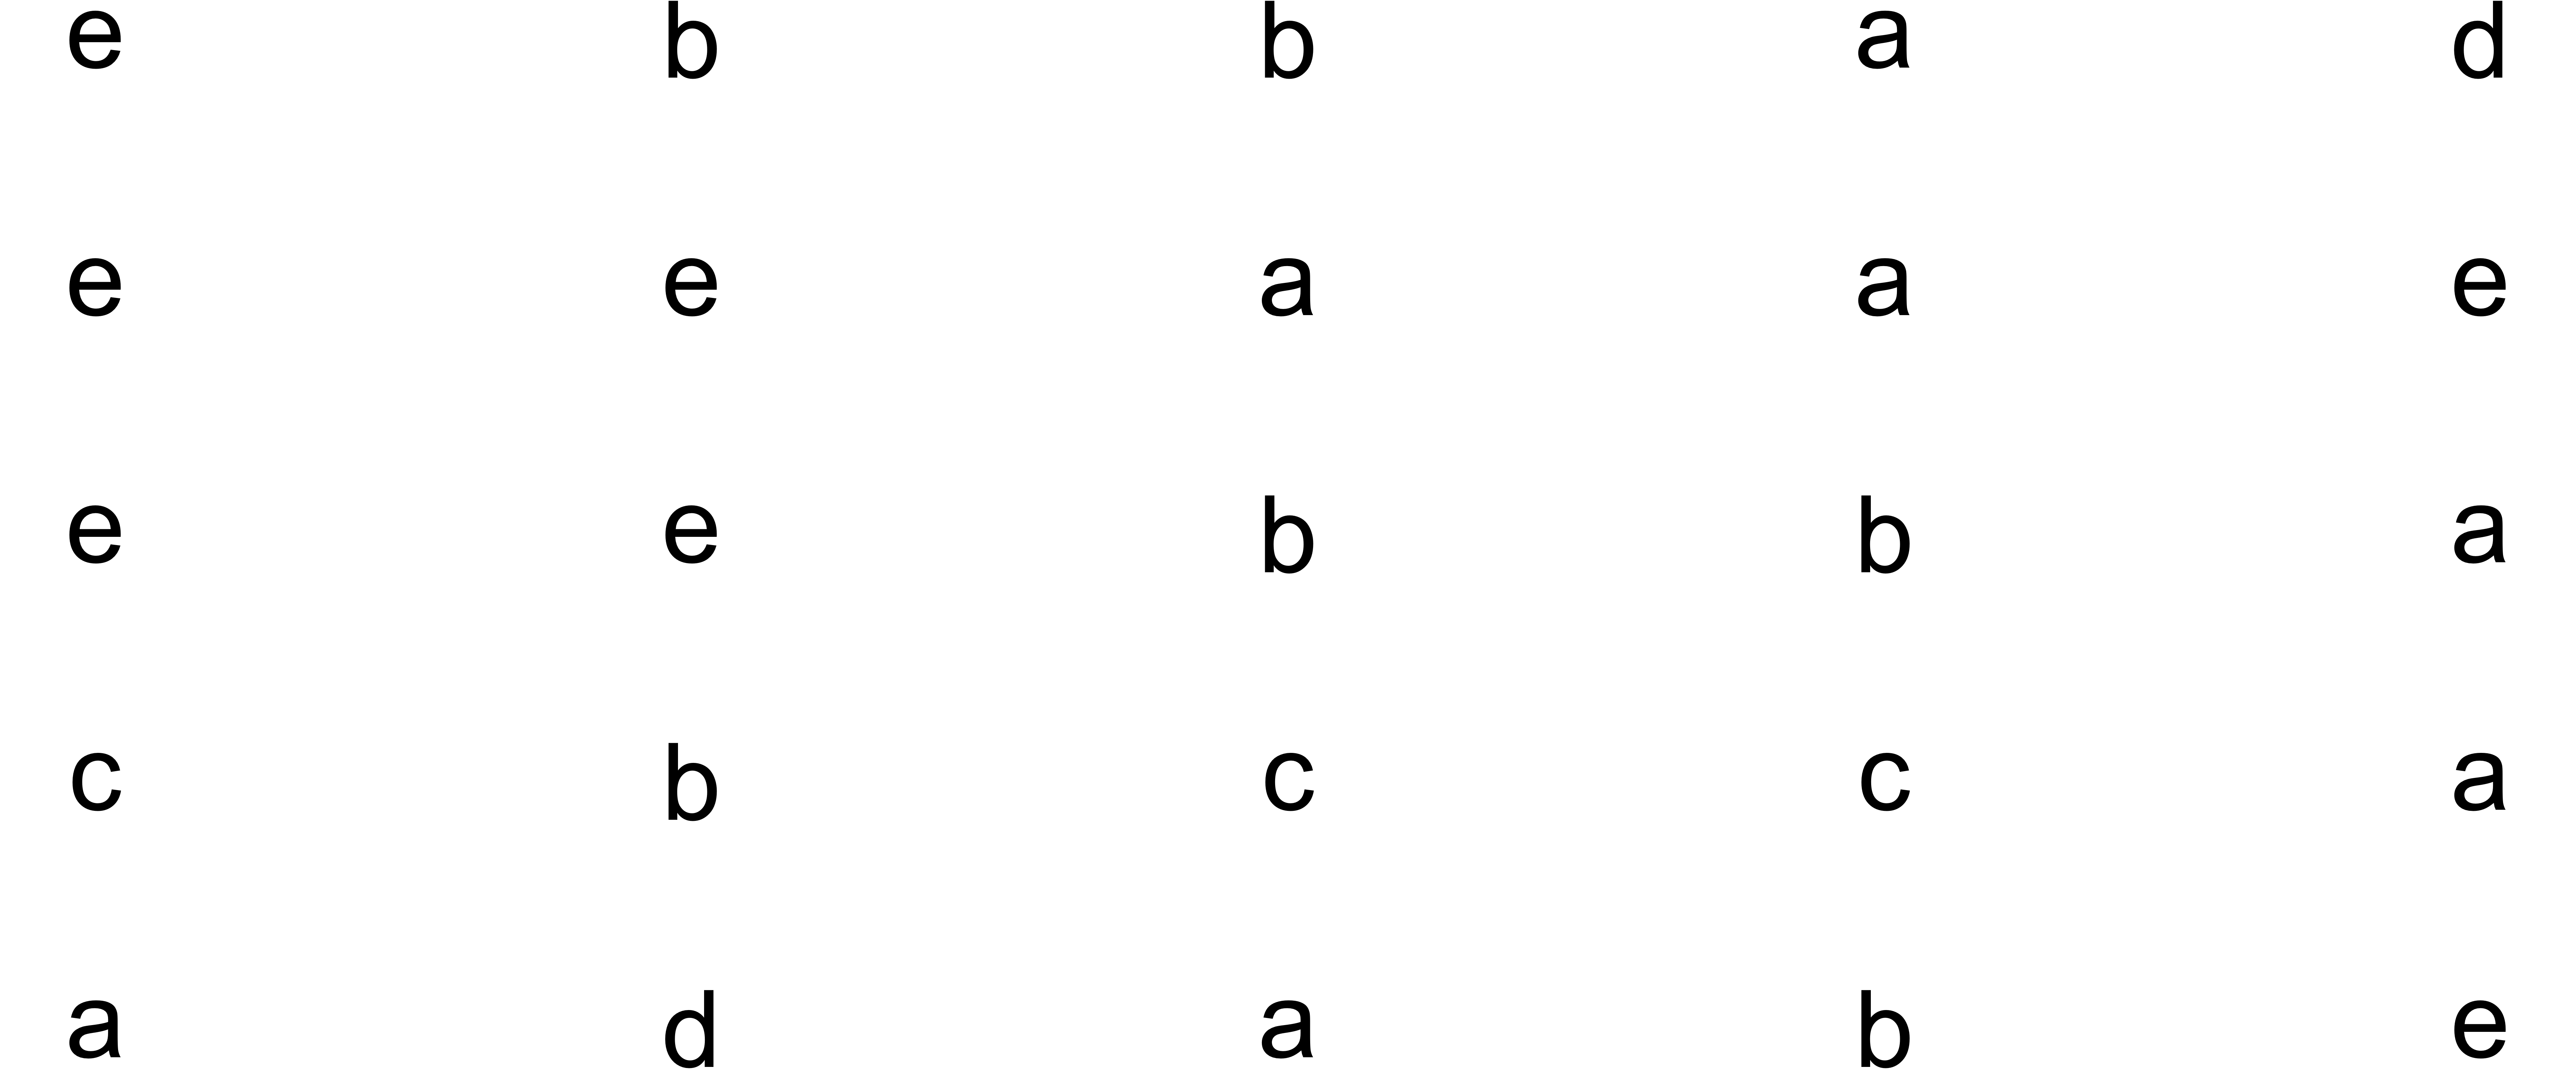

In [ ]:
set.seed(1)
xy = expand.grid(seq(0,1, length.out = 5), seq(0,1, length.out = 5))
text = sample(c("a", "b", "c", "d", "e"), 25, replace = TRUE)
par(mar = c(0.1,0,0,0))
plot(c(0, 1), c(0, 1), ann = F, bty = 'n',type = 'n', xaxt = 'n', yaxt = 'n')
text(xy[,1], xy[,2], text, cex = 3)

## How many “b”s are there?

-   bottom-up attention: unconscious & fast

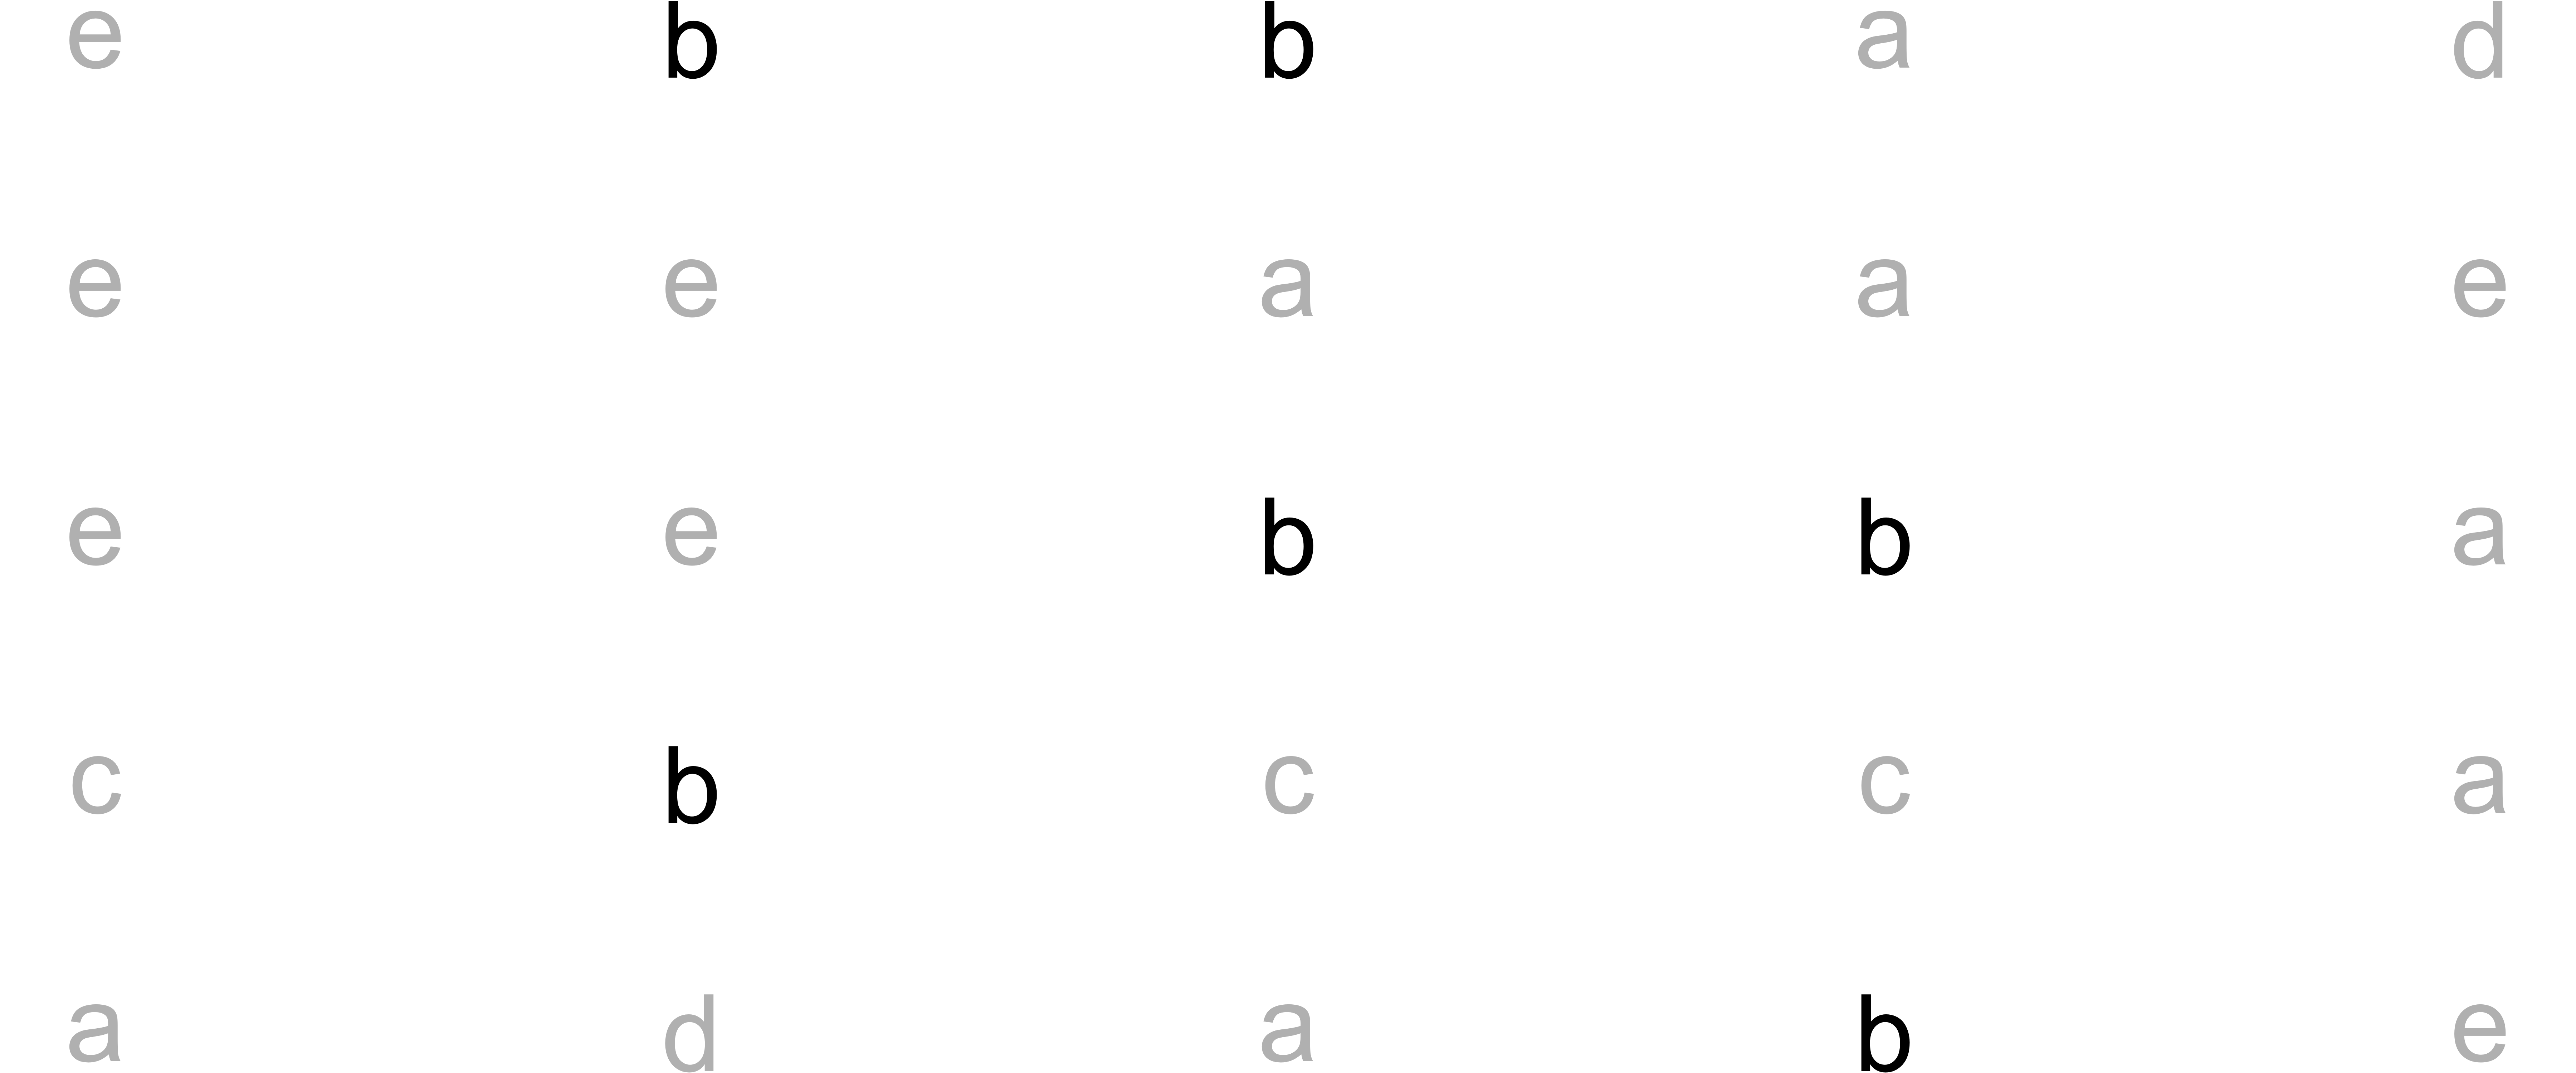

In [ ]:
par(mar = c(0,0,0,0))
plot(c(0, 1), c(0, 1), ann = F, bty = 'n',type = 'n',  xaxt = 'n', yaxt = 'n')
text(xy[,1], xy[,2], text, cex = 3, col = ifelse(text == "b", "black", "gray"))

## How many “ш”s are there?

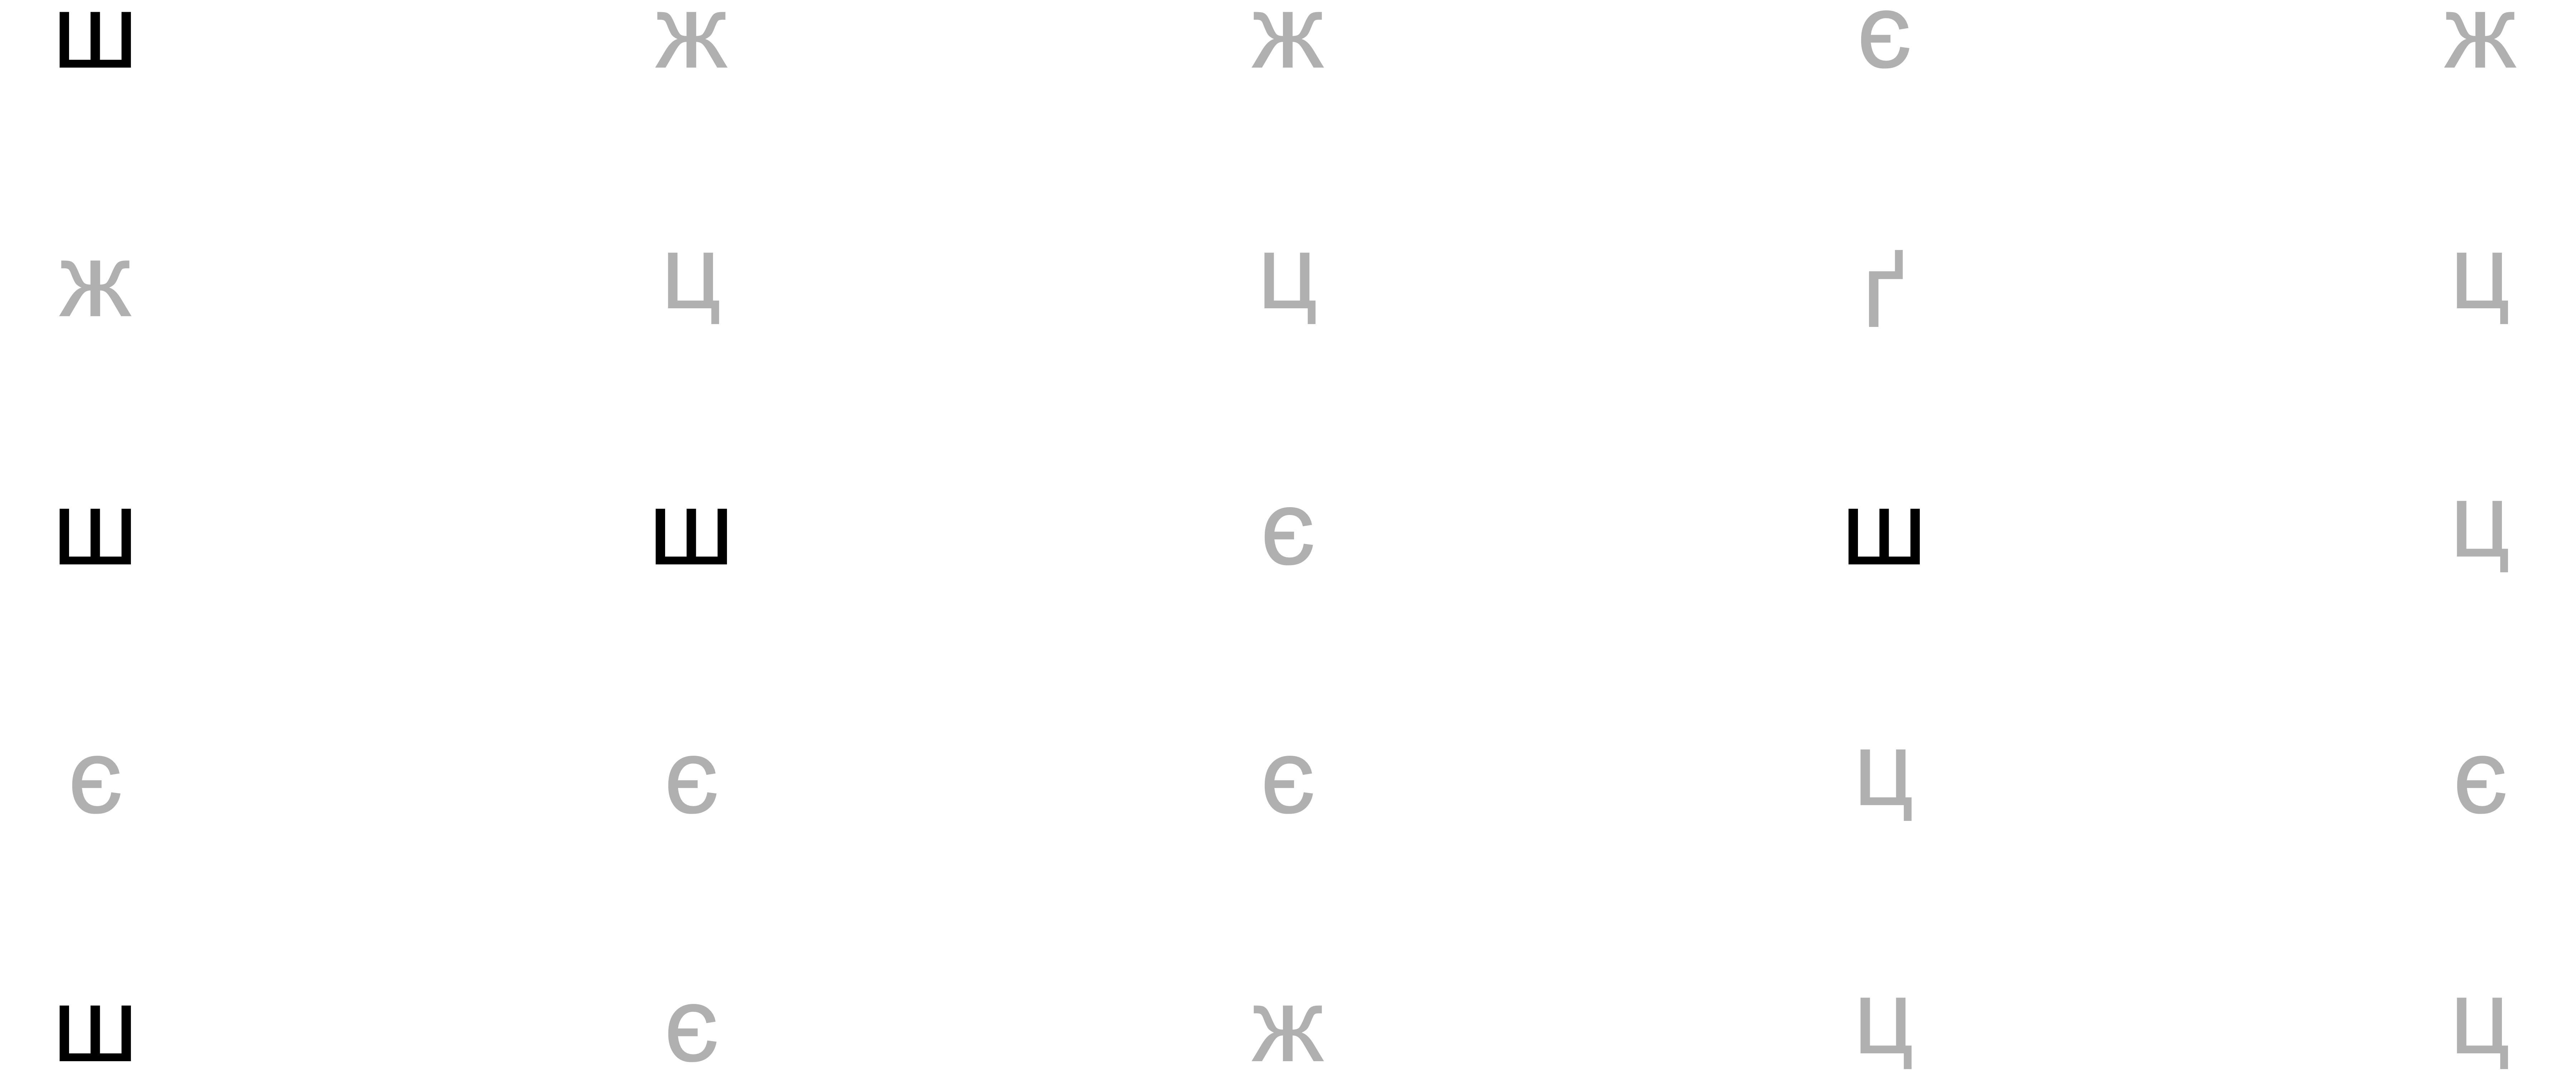

In [ ]:
par(mar = c(0,0,0,0))
text_cyr <- sample(c("ш", "ц", "ж", "є", "ґ"), 25, replace = TRUE)
plot(c(0, 1), c(0, 1), ann = F, bty = 'n',type = 'n',  xaxt = 'n', yaxt = 'n')
text(xy[,1], xy[,2], text_cyr, cex = 3, col = ifelse(text_cyr == "ш", "black", "gray"))

## Areas can be useful to add a third (least important) variable

ℹ Please use `linewidth` instead.

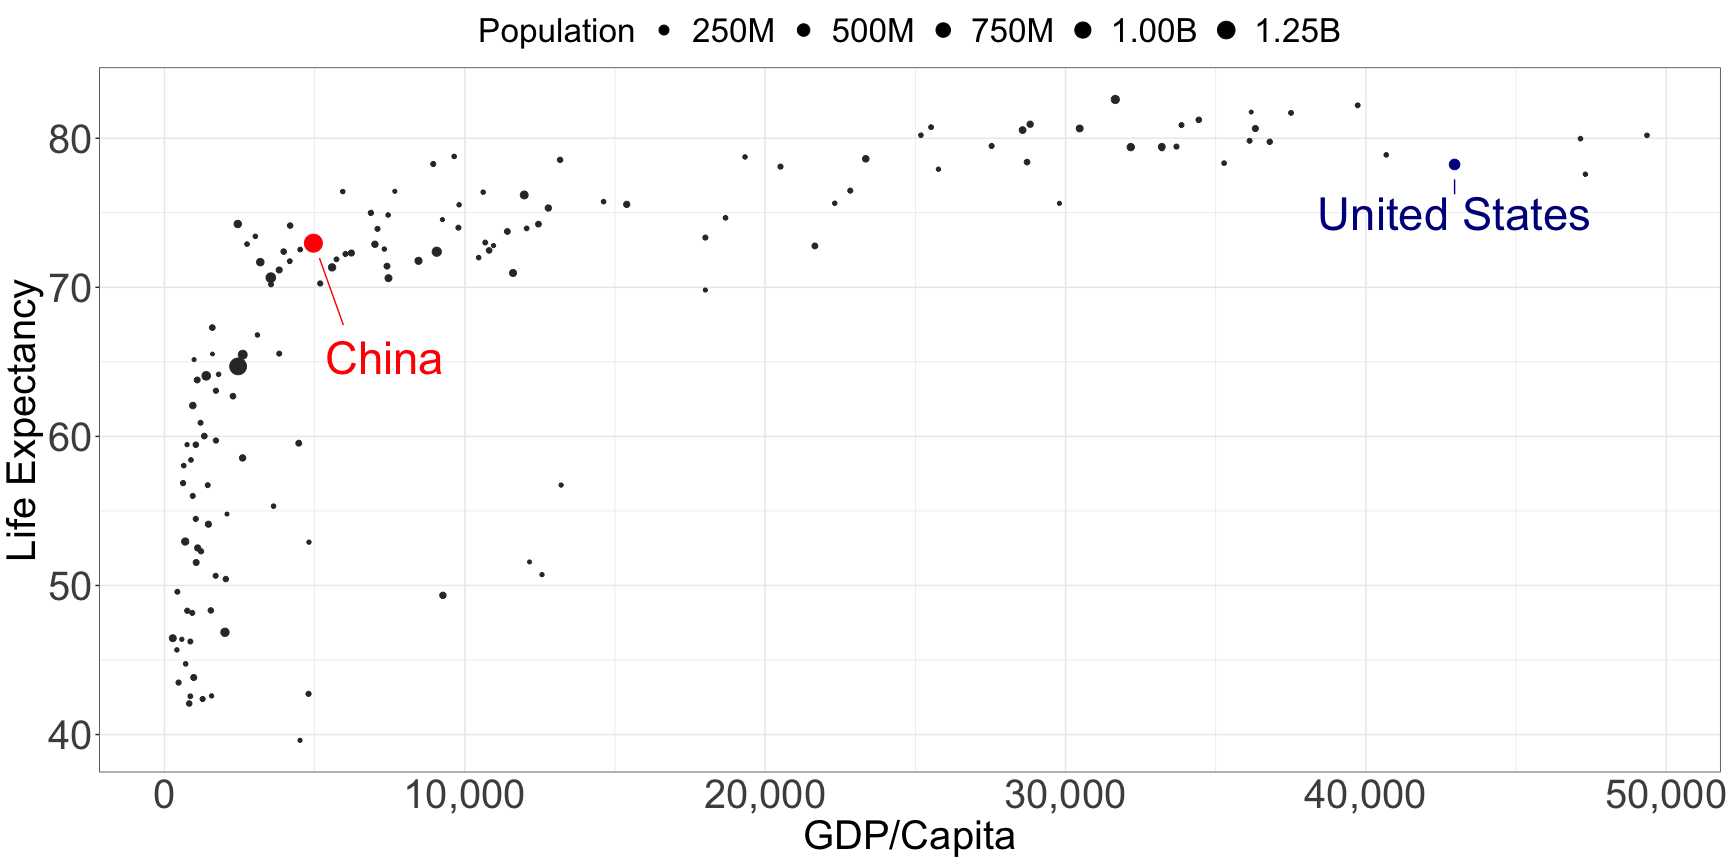

In [ ]:
library(gapminder)
library(dplyr)
library(scales)
gm_last <- gapminder |>
  group_by(country) |>
  slice_max(year) |>
  mutate(hl = as.factor(ifelse(country %in% c("China", "United States"), country, 'other')))
ggplot(gm_last, aes(y = lifeExp, x = gdpPercap, size = pop, color = hl)) +
  geom_point() +
  scale_size(
    name = "Population",
    labels = label_number(scale_cut = cut_short_scale()),
    ) +
  geom_text(
    aes(label = country, x = gdpPercap, y = lifeExp),
    data = filter(gm_last, country %in% c('China', 'United States')),
    hjust = c(-0.1, 0.5),
    vjust = c(4, 2),
    size = 12
    ) +
  geom_segment(
  aes(
    x = gdpPercap + c(200, 0), 
    y = lifeExp - 1, 
    xend = gdpPercap+c(1000, 0), 
    yend = lifeExp-c(5.5, 2)),
  data = filter(gm_last, country %in% c('China', 'United States')),
  size = 0.5
  ) +
  scale_x_continuous(labels = label_comma()) +
  scale_color_manual(values = c('gray20', 'red', 'darkblue')) +
  guides(colour = 'none') +
  labs(y = "Life Expectancy", x = "GDP/Capita") +
  theme_bw() +
    theme(
    plot.title=element_text(size=35),
    axis.ticks.x=element_blank(),
    axis.text=element_text(size=30),
    axis.title=element_text(size=30),
    legend.position='top',
    legend.text=element_text(size=25),
    legend.title=element_text(size=25)
  )

## Do not use pie-charts… just don’t

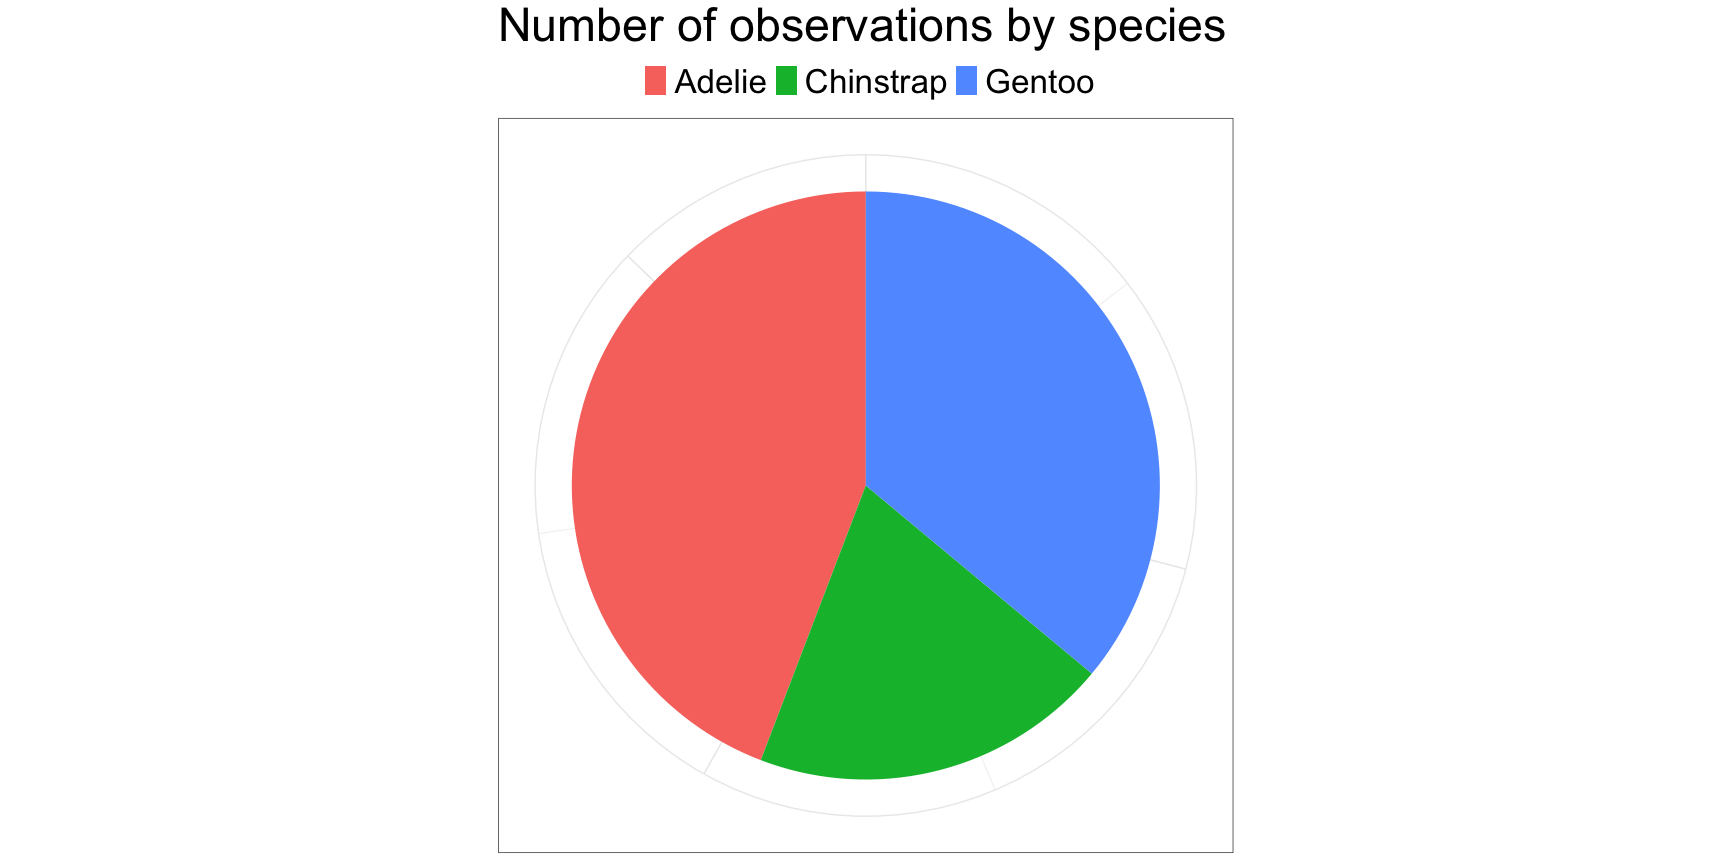

In [ ]:
penguins |>
  group_by(species) |>
  summarize(count = n()) |>
ggplot(aes(x = "", y = count, fill = species)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Number of observations by species",
    ) +
  theme_bw() +
    theme(
    plot.title=element_text(size=35),
    axis.ticks=element_blank(),
    axis.text=element_blank(),
    axis.title=element_blank(),
    legend.position='top',
    legend.text=element_text(size=25),
    legend.title=element_blank()
  ) +
  coord_polar("y", start=0) 

## Exercise

> **Perceptual accuracy**
>
> -   Create a graph that shows the population of penguins for the
>     different species per island
> -   It is of particular interest which species is the most common on
>     each island
> -   Create another graph that shows the analysis separately for the
>     two sexes

## Visualizing many categories (badly!)

-   What is the 5th smallest state?
-   Where does MO rank in terms of size?

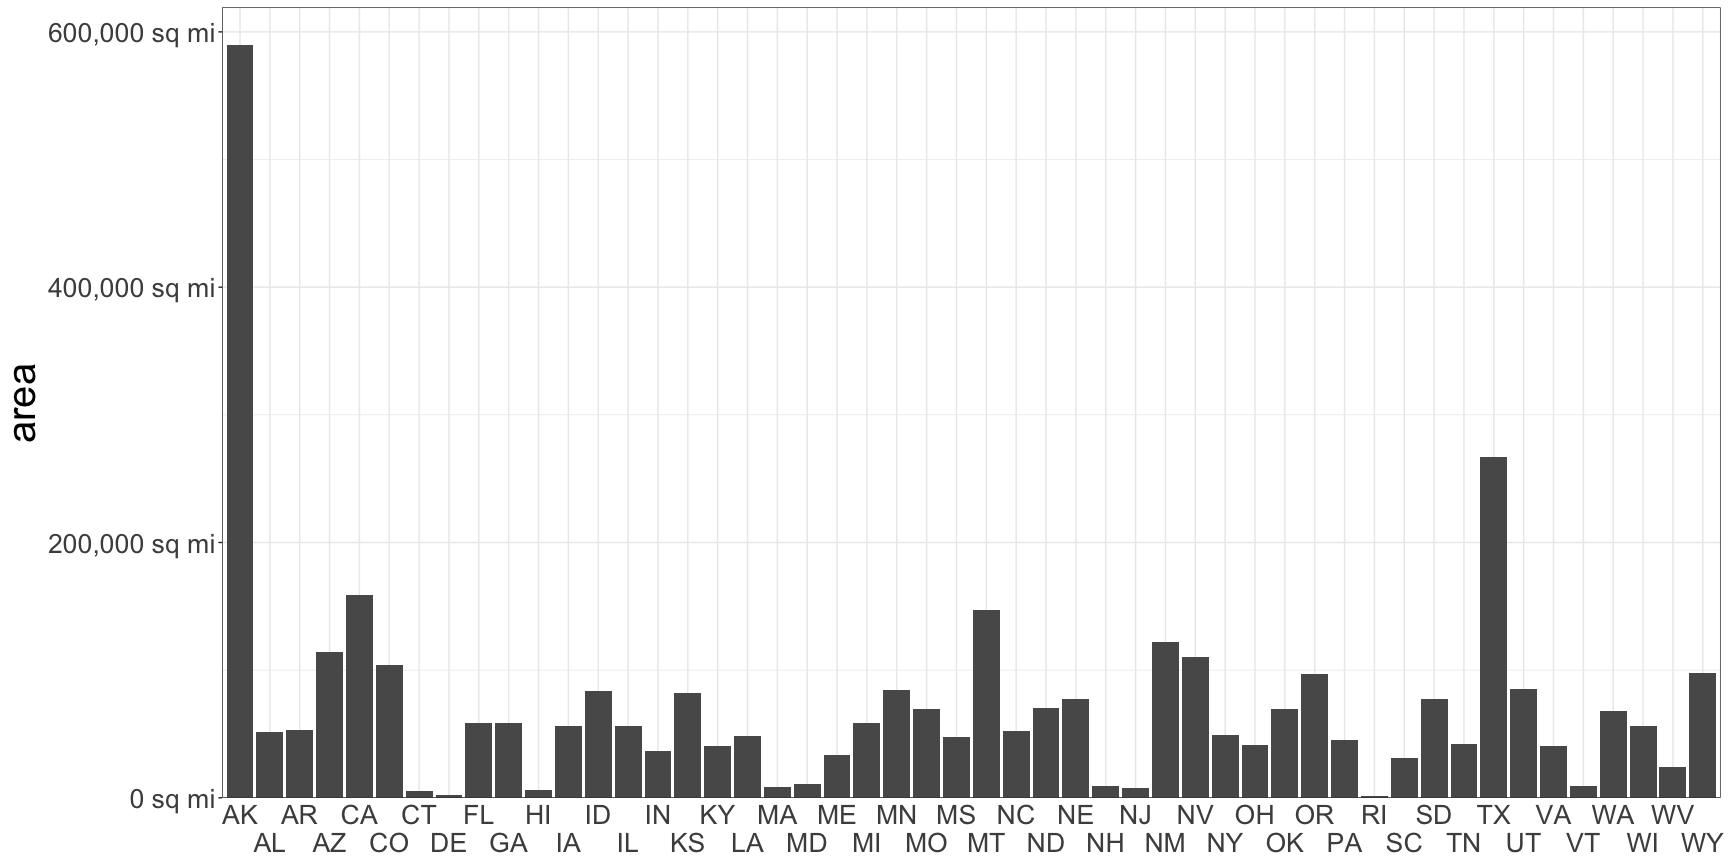

In [ ]:
library(datasets)
library(scales)
ggplot(data.frame(abb = state.abb, area = state.area), aes(x = abb, y = area)) +
  geom_bar(stat = 'identity') +
  scale_x_discrete(guide = guide_axis(n.dodge = 2)) +
  scale_y_continuous(
    expand = expansion(c(0,0.05)),
    labels = label_comma(suffix = " sq mi")) + 
  theme_bw() +
    theme(
    plot.title=element_text(size=35),
    axis.ticks.x=element_blank(),
    axis.text=element_text(size=20),
    axis.title=element_text(size=30),
    axis.title.x=element_blank()
  )

## Visualizing many categories

-   What is the 5th smallest state?
-   Where does MO rank in terms of size?

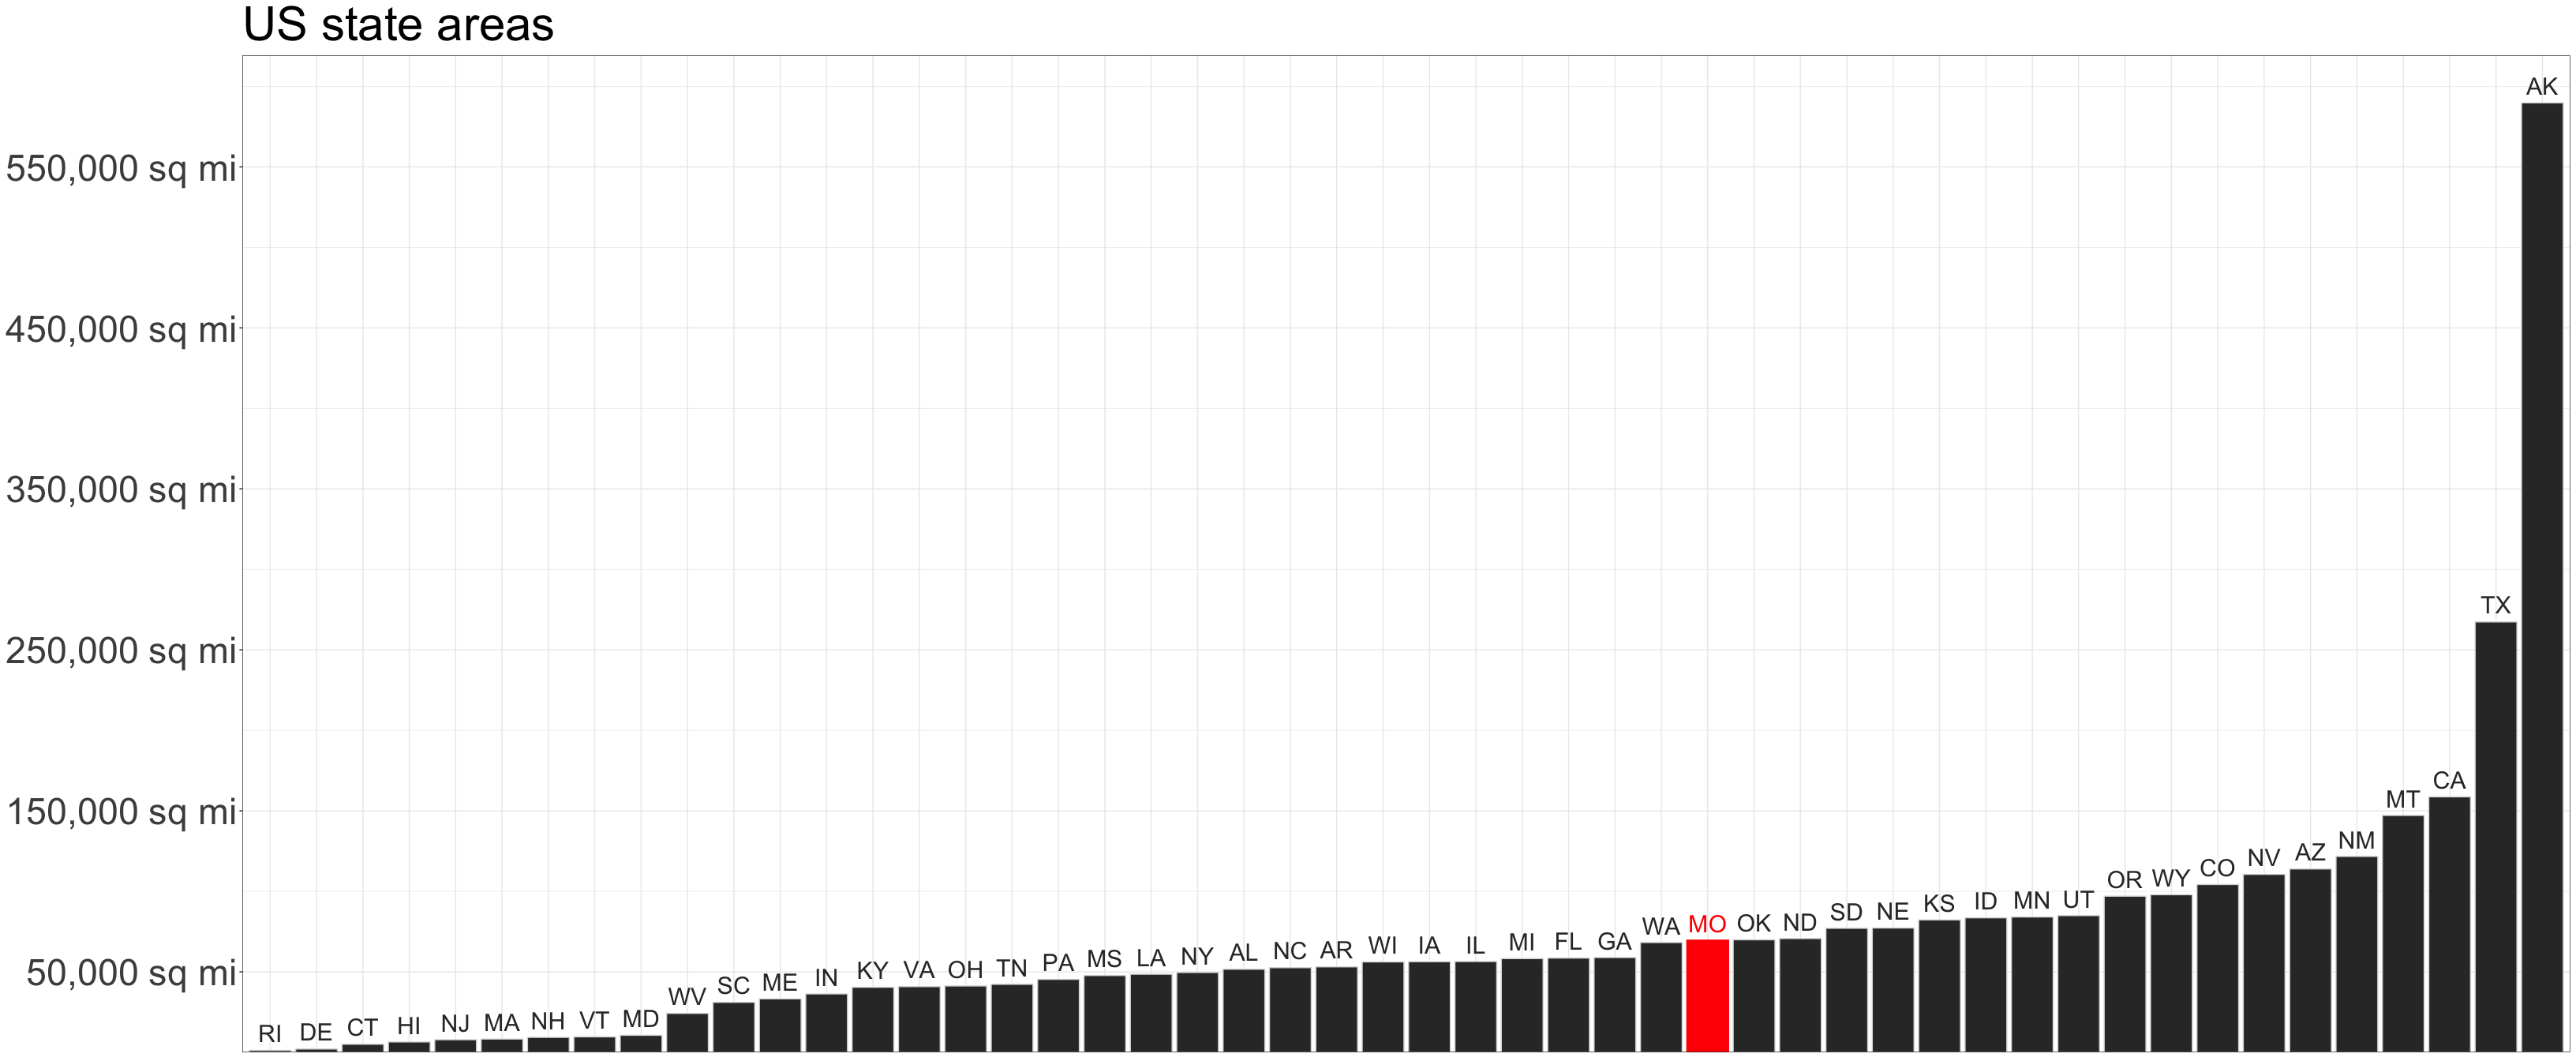

In [ ]:
library(colorspace)
library(forcats)
state_areas <- data.frame(abb = state.abb, area = state.area, name = state.name) |>
  mutate(abb = fct_reorder(abb, area))
ggplot(state_areas, aes(x = abb, y = area, 
  color = abb == 'MO', fill = abb == 'MO')) +
  geom_bar(stat = 'identity') +
  scale_y_continuous(
    expand = expansion(c(0,0.05)), breaks = seq(50000,600000, by = 100000),
    labels = label_comma(suffix = " sq mi")) + 
  scale_color_manual(values = c('gray85', 'red')) +
  scale_fill_manual(values = c('gray20', 'red')) +
  geom_text(
    aes(label=abb, y = area), 
    position=position_dodge(width=0.9), 
    vjust=-0.50, 
    color = ifelse(state_areas$abb=='MO', 'red', 'gray20'),
    size = 8)+
  labs(title = "US state areas") +
  theme_bw() +
    theme(
    plot.title=element_text(size=45),
    axis.ticks.x=element_blank(),
    axis.text=element_text(size=35),
    axis.text.x=element_blank(),
    axis.title=element_blank(),
    legend.position='none'
  )

## Color intensity provides less accurate encoding

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE

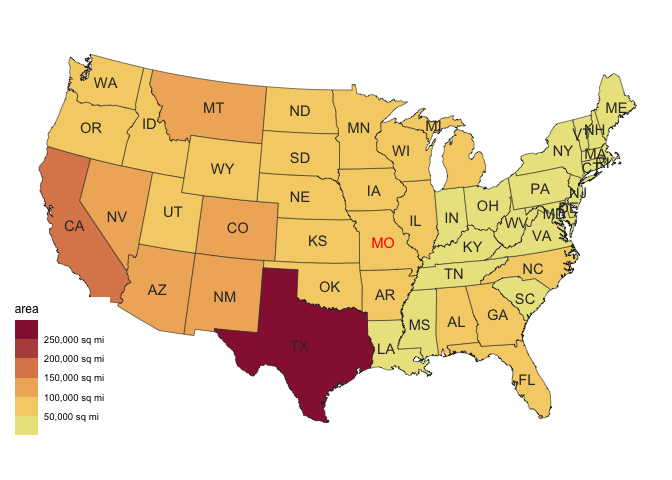

In [ ]:
library(maps)
library(sf)

## Colors are useful to mark targets for preattentive processing

-   Large scale spatial data needs to be “projected” to 2D
-   Most well known projection is
    [4326](https://spatialreference.org/ref/epsg/4326/) measured in
    degrees latitude and longitude
-   However, there are more accurate projections for specific regions
    e.g, [3035](https://spatialreference.org/ref/epsg/3035/) for
    EU+candidates

all geometries

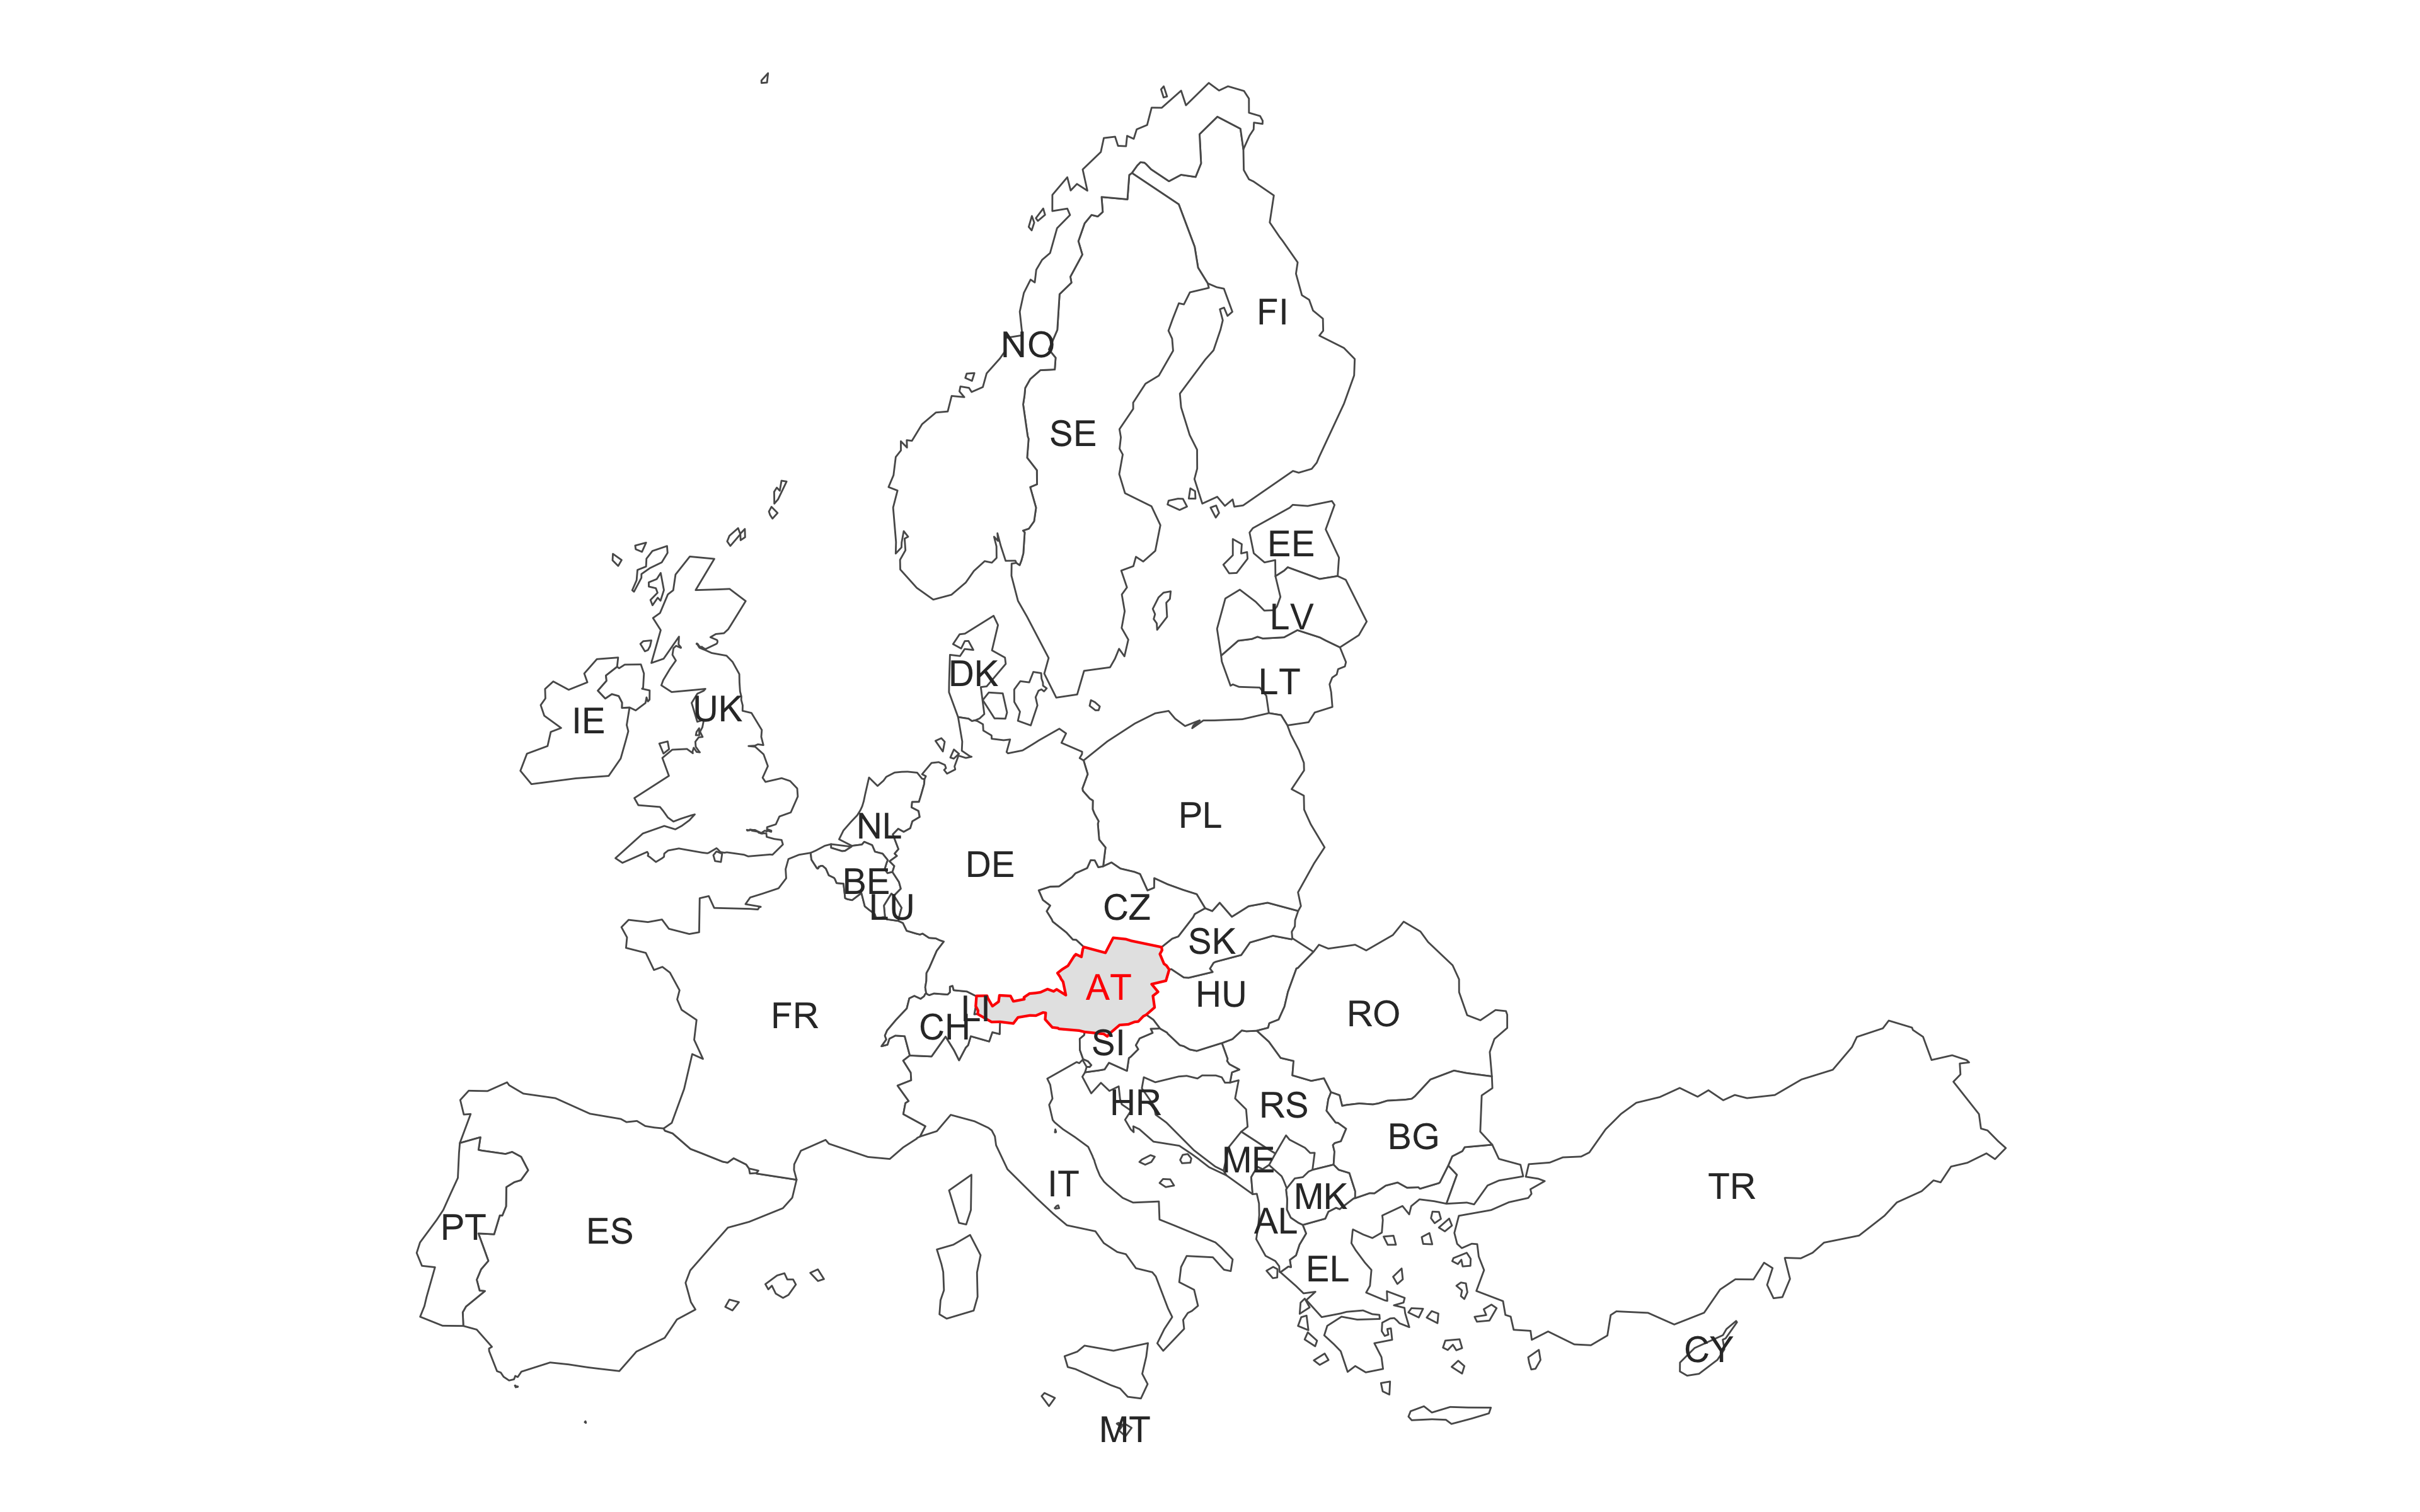

In [ ]:
## Example using "shapefile"
### e.g. for EU download here https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts
eu <- st_read("data/NUTS_RG_60M_2021_3035.shp/", quiet = TRUE)
eu0 <- filter(eu, LEVL_CODE == 0)
## Transform to longitude and latitude
eu0 <- eu0 |> st_transform(4326)
eu0_box <- eu0 |> st_bbox()
eu0_box <- eu0_box + c(50, 20, 0, -10)
ggplot(st_crop(eu0, eu0_box))+ 
  geom_sf(fill = 'white', lwd = 1) +
  geom_sf(data = filter(eu0, CNTR_CODE == 'AT'), color = 'red', lwd =1.5) + 
  coord_sf(crs = st_crs(3035)) +
  geom_sf_text(aes(label = CNTR_CODE, color = CNTR_CODE == 'AT'), size = 15) +
  scale_color_manual(values = c('gray20', 'red')) +
  guides(color = 'none') + 
  ggthemes::theme_map(base_size = 12) 

## Exercise

> **Geospacial data**
>
> -   Obtain the shape (“SHP”) file for the EU + candidates from
>     [Eurostat](https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts)
> -   Crop the data to exclude overseas territories
> -   Highlight the “DACH” region

## “Connectedness” helps connecting the dots

`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.

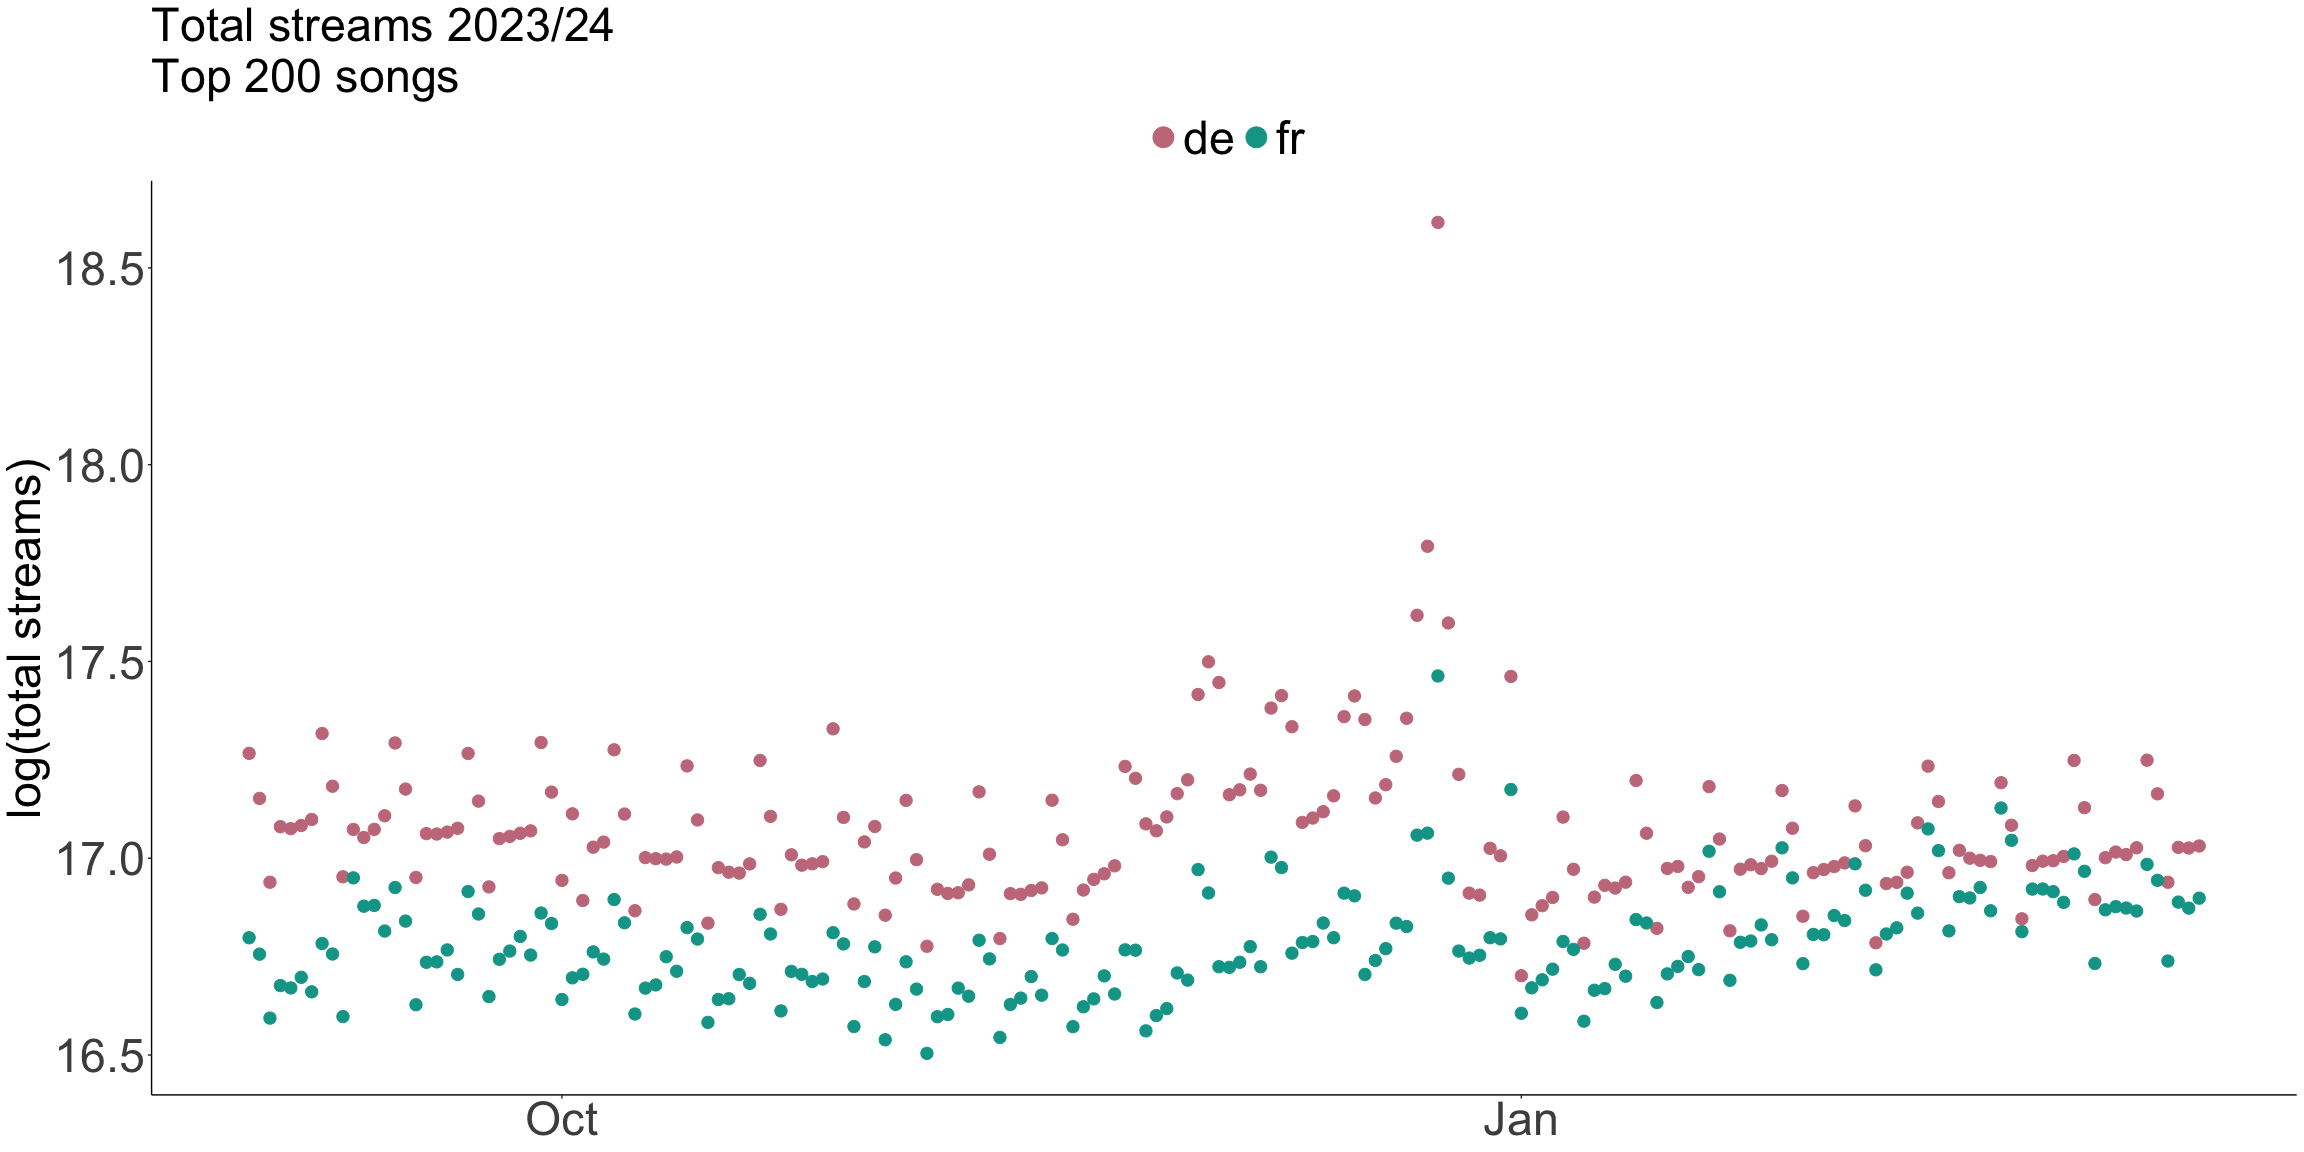

In [ ]:
charts <- arrow::read_parquet(
    "data/chart_data/spotify_charts.parquet")  |> 
    filter(country %in% c("de", "fr")) |>
    group_by(country, date) |>
    summarize(total_streams = sum(streams)) 

## “Connectedness” helps connecting the dots

`summarise()` has grouped output by 'country'. You can override using the
`.groups` argument.

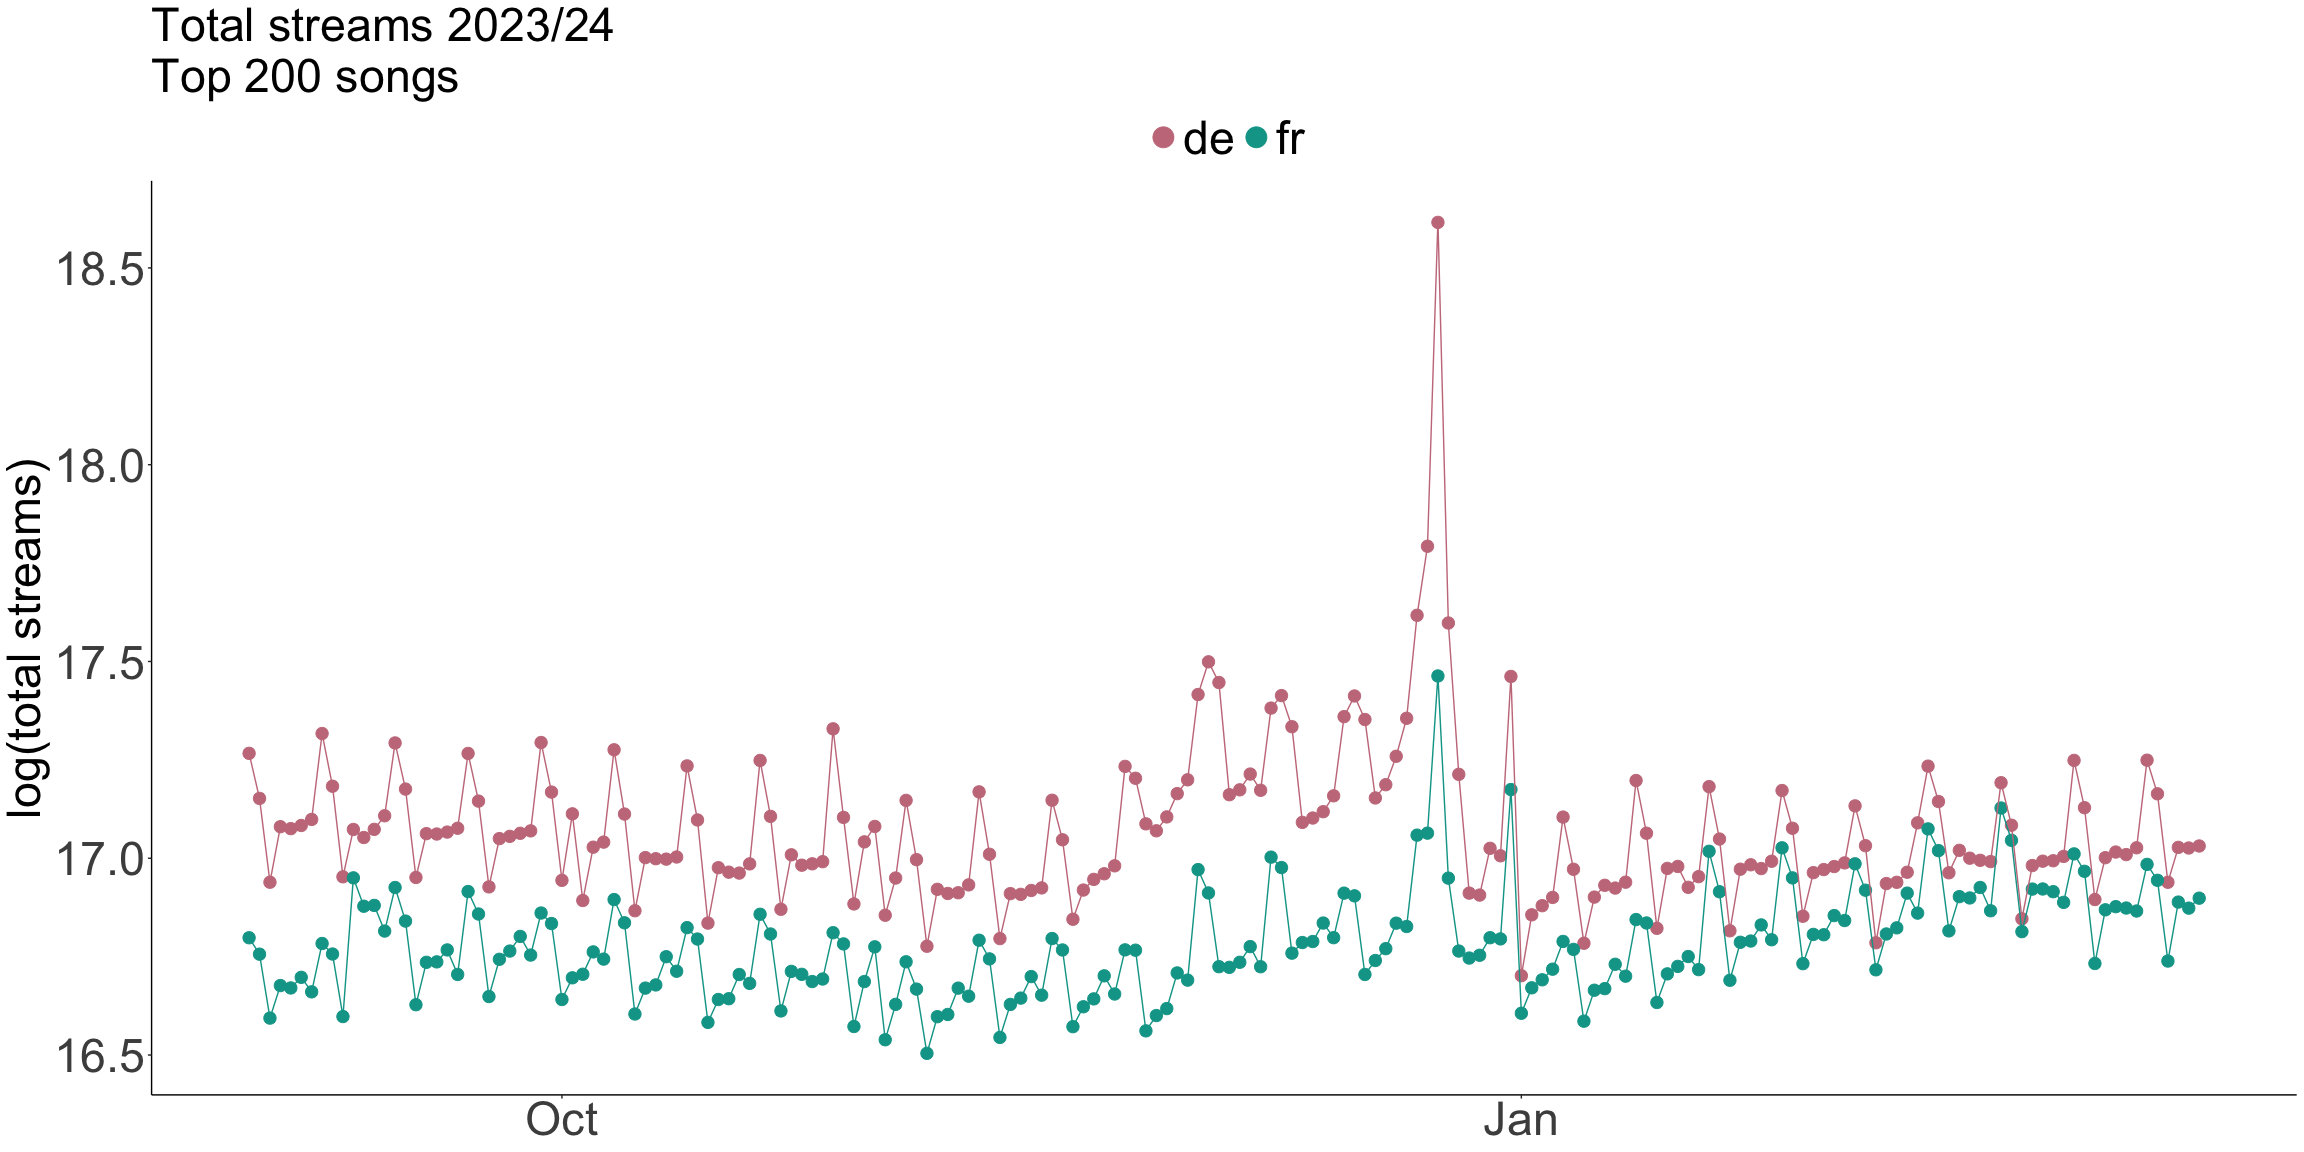

In [ ]:
charts <- arrow::read_parquet(
    "data/chart_data/spotify_charts.parquet")  |> 
    filter(country %in% c("de", "fr")) |>
    group_by(country, date) |>
    summarize(total_streams = sum(streams)) 

## Use scatter plots to show correlation

`geom_smooth()` using formula = 'y ~ x'

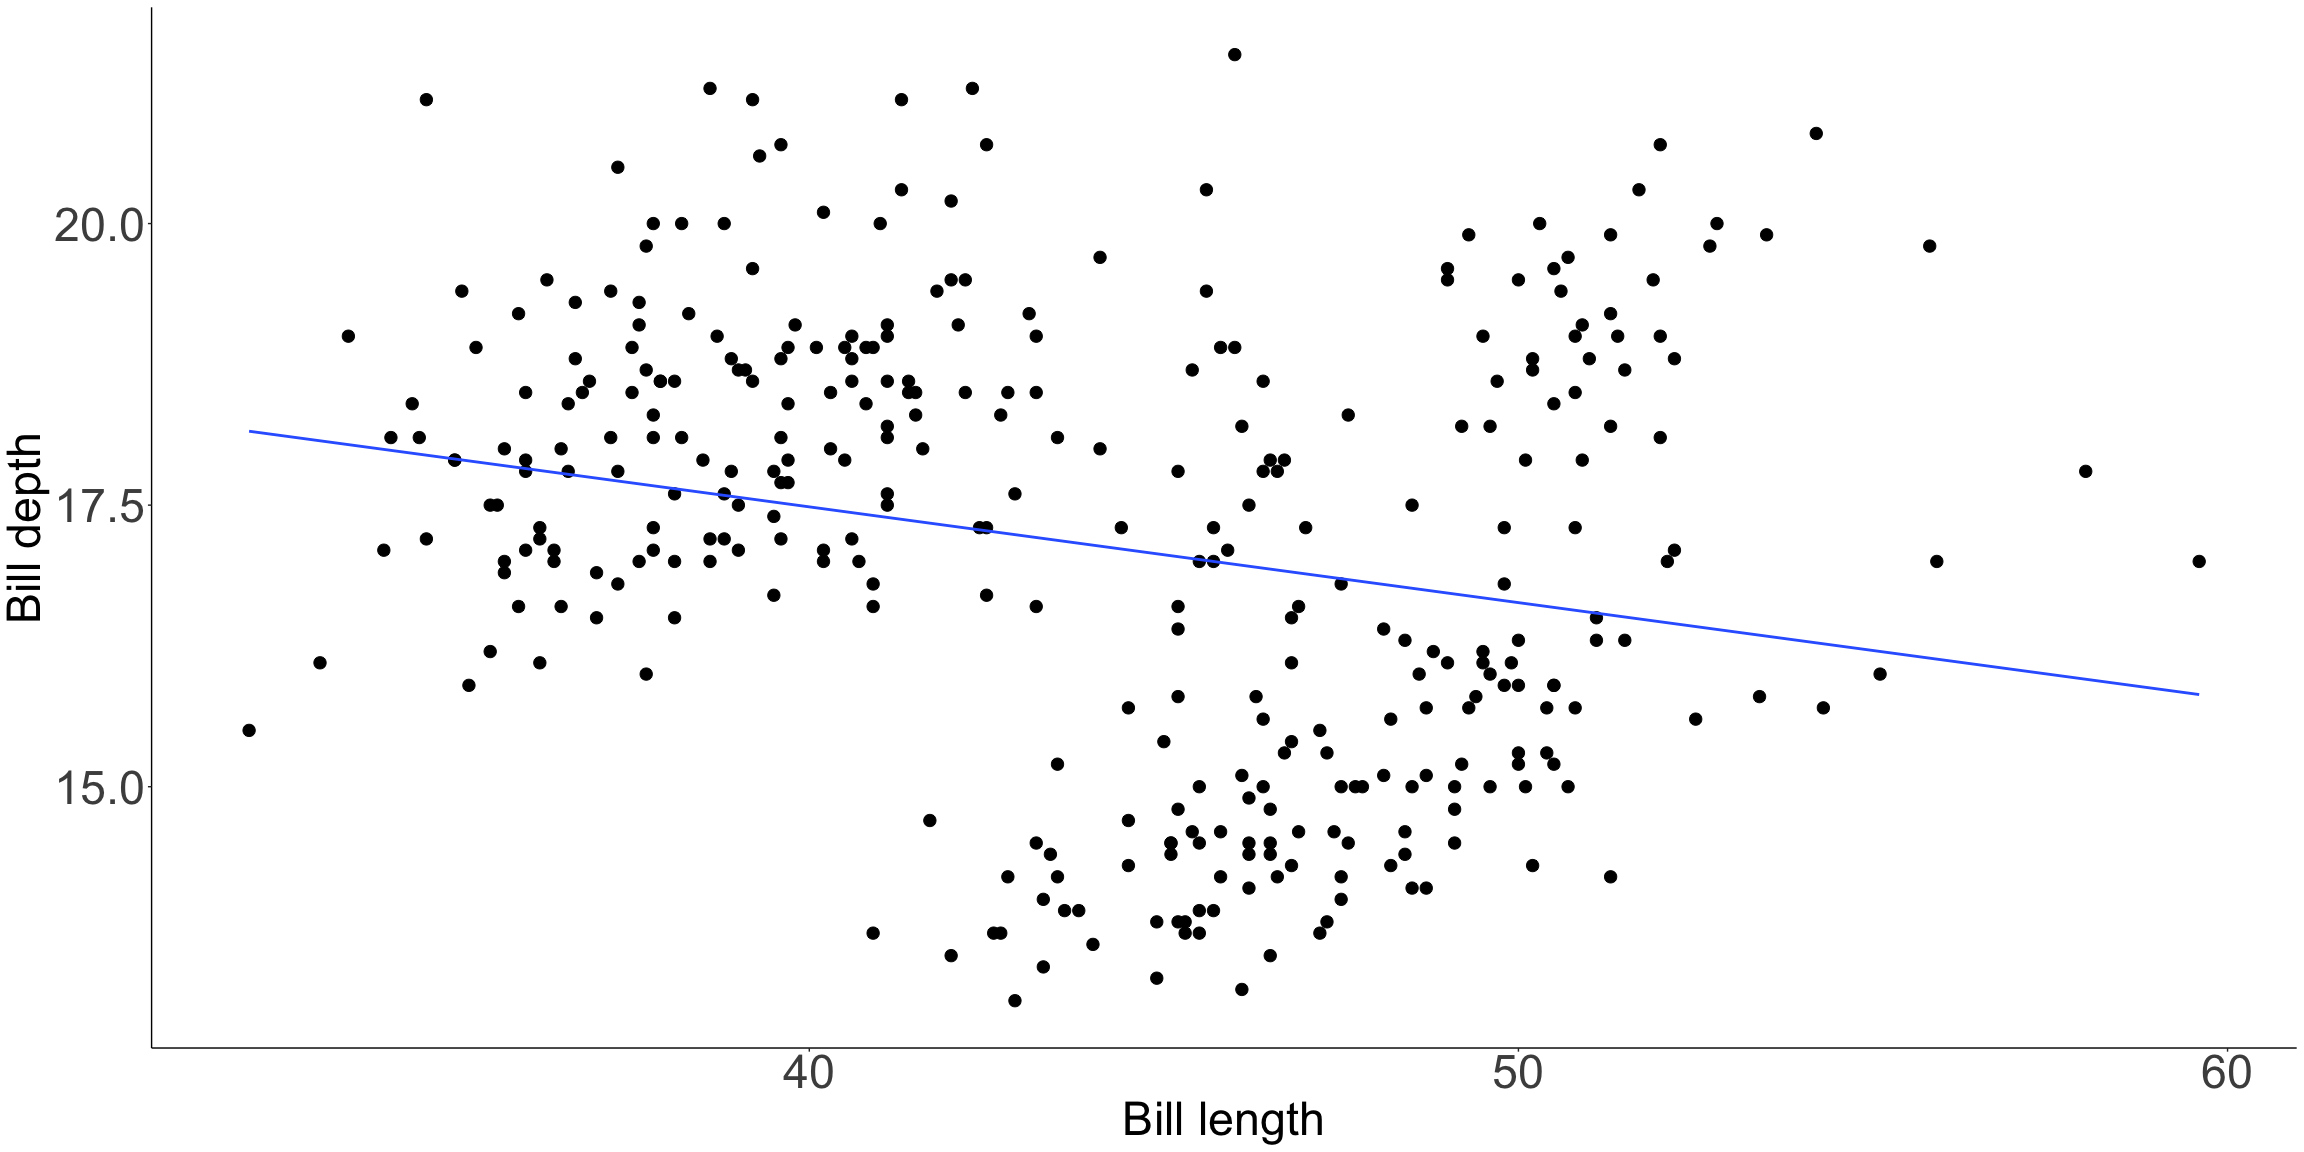

In [ ]:
penguins |>
ggplot(aes(x = bill_length_mm, y = bill_depth_mm, #color = species
)) +
    geom_point(size = 4) +
    geom_smooth(method = 'lm', se = FALSE) +
    guides(colour = guide_legend(override.aes = list(size=7))) +
    theme_classic() +
    labs(y = "Bill depth", x = "Bill length") +
    theme(
        axis.text=element_text(size=35),
        axis.title=element_text(size=35),
    )

## Beware of “Simpson’s Paradox”

-   When between-group correlation is the opposite of within-group
    correlation

`geom_smooth()` using formula = 'y ~ x'

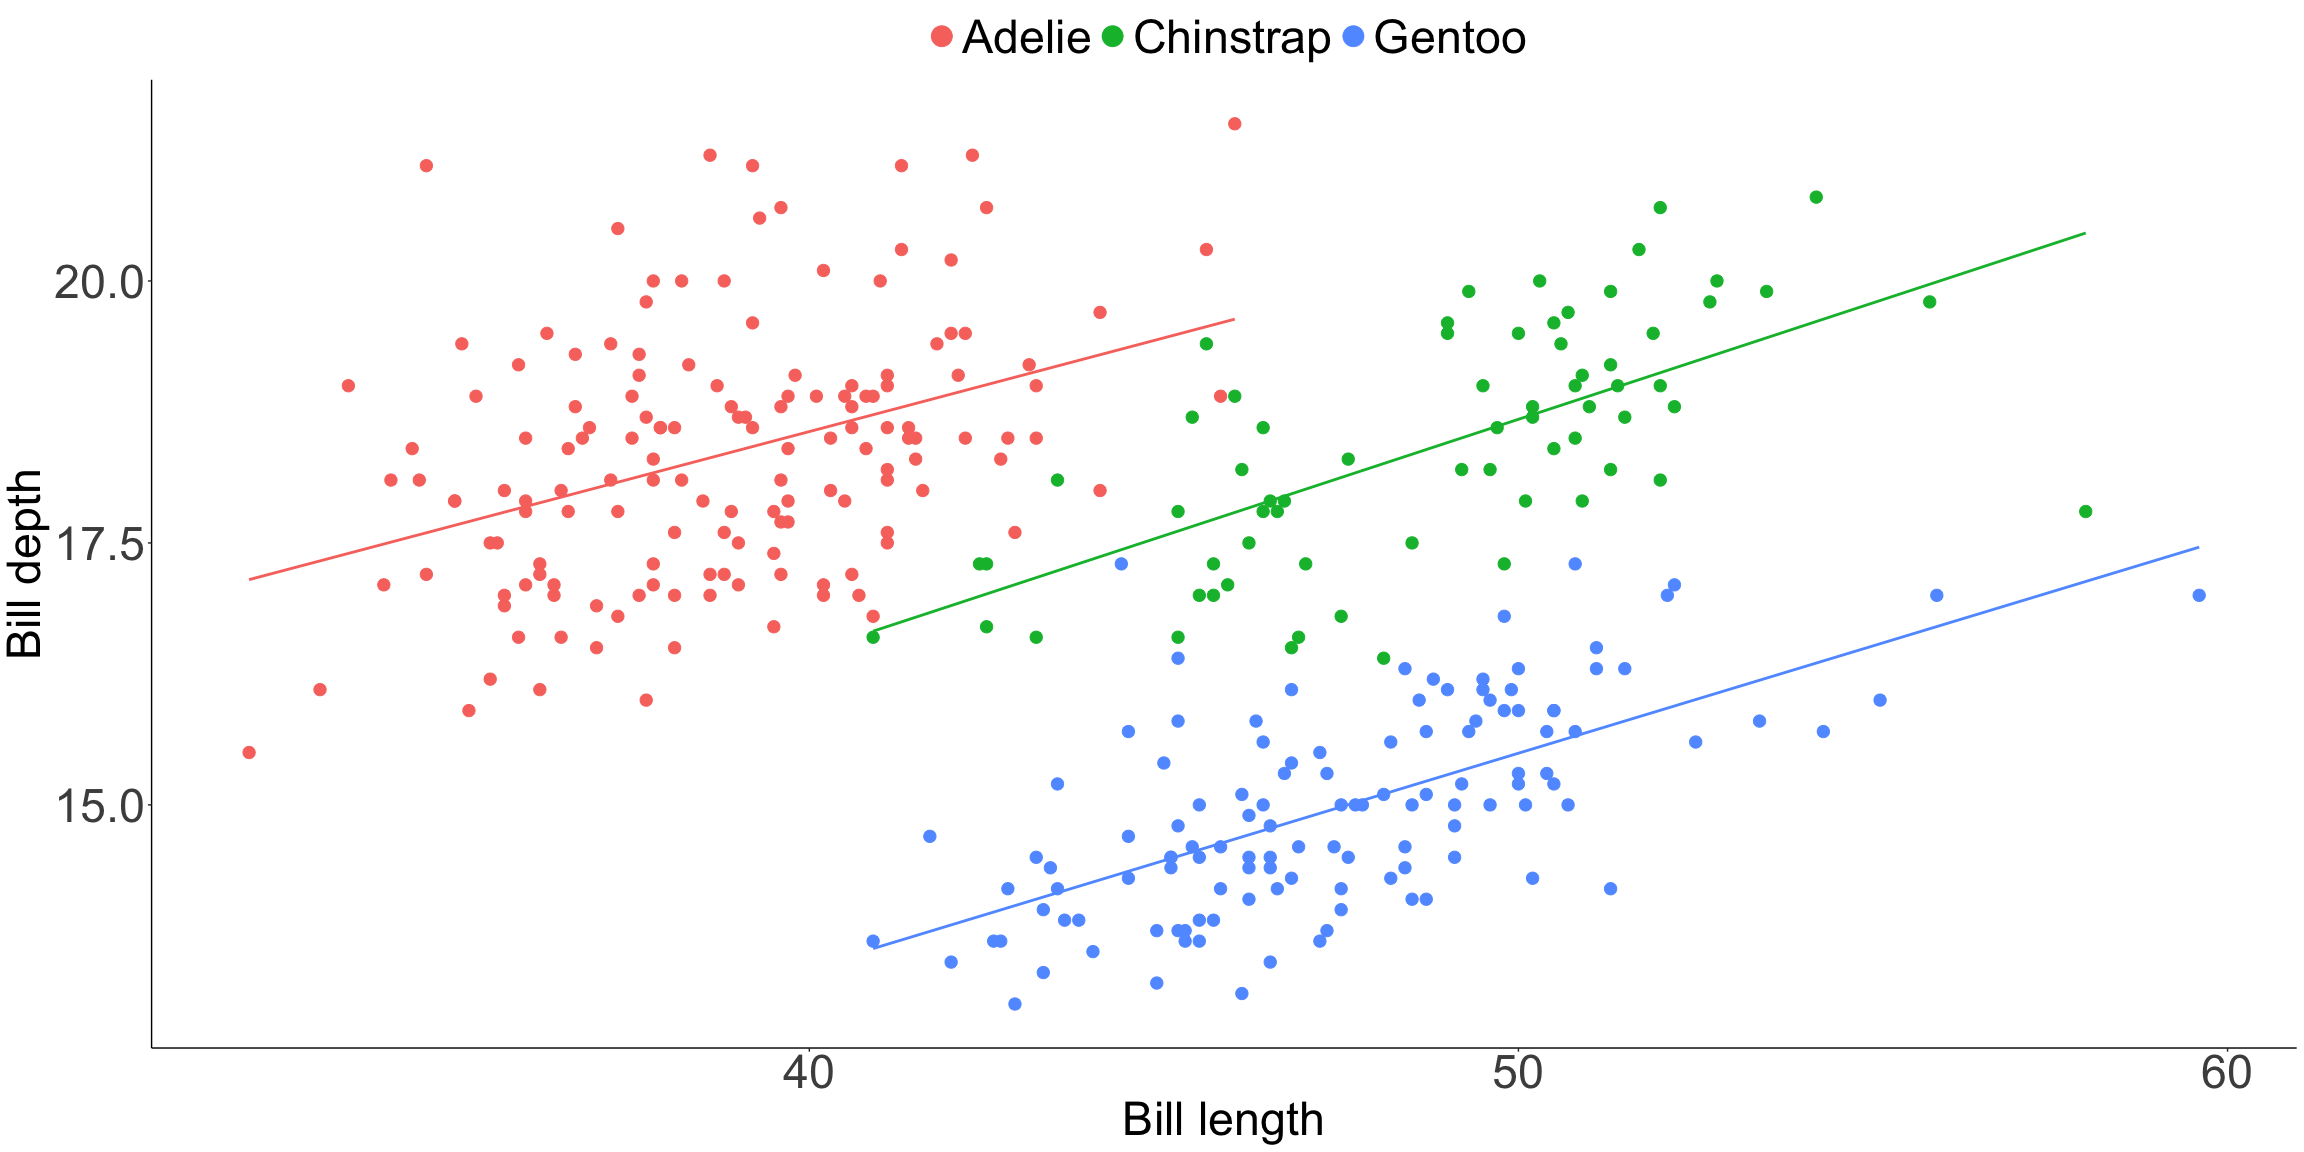

In [ ]:
penguins |>
ggplot(aes(x = bill_length_mm, y = bill_depth_mm, color = species)) +
    geom_point(size = 4) +
    geom_smooth(method = 'lm', se = FALSE) +
    guides(colour = guide_legend(override.aes = list(size=7))) +
    theme_classic() +
    labs(y = "Bill depth", x = "Bill length") +
    theme(
        legend.text = element_text(size = 35),
        legend.title = element_blank(),
        axis.text=element_text(size=35),
        axis.title=element_text(size=35),
        legend.position = 'top',
    )

## Use Boxplots to show distributions

In [ ]:
penguins |>
ggplot(aes(
  y = bill_length_mm, 
  x = fct_reorder(species, bill_length_mm, .fun = median, .na_rm = TRUE))) +
    geom_boxplot(na.rm = TRUE) +
    theme_classic() +
    labs(y = "Bill length") +
    theme(
        legend.text = element_text(size = 35),
        legend.title = element_blank(),
        axis.text=element_text(size=35),
        axis.title=element_text(size=35),
        axis.title.x=element_blank(),
        legend.position = 'top',
    )

## A few notes on colors

-   The `library(colorspace)` has convenient functions for [picking
    correct color
    patterns](https://colorspace.r-forge.r-project.org/articles/ggplot2_color_scales.html)
-   Palette type depends on the scaling of the data visualized
    -   Is the data discrete or continuous?
    -   Is there an ordering?
        -   Is the ordering diverging (i.e., there is a neutral state)?
-   There are convenience functions for `ggplot`

> scale\_<aesthetic>*<datatype>*<colorscale>()

-   `aesthetic`s: `fill`, `color`
-   `datatype`s: `discrete`, `continuous`, `binned`
-   `colorscale`s: `qualitative`, `sequential`, `diverging`

## Diverging colors: correlation matrix

-   Diverging from -1 to 1 with 0 as a neutral point

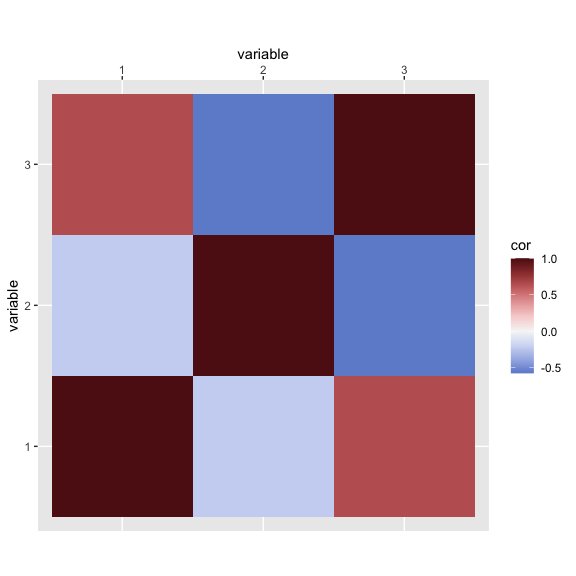

In [ ]:
corrs <- palmerpenguins::penguins |> 
  drop_na() |> 
  select(bill_length_mm, bill_depth_mm, flipper_length_mm) |>
  cor()
cor_df <- data.frame(cor = c(corrs), var1 = factor(col(corrs)), var2 = factor(row(corrs)))
ggplot(cor_df, aes(var1, var2, fill = cor)) + 
  geom_tile() + 
  coord_fixed() +
  ylab("variable") +
  scale_x_discrete(position = "top", name = "variable") +
  scale_fill_continuous_diverging("Blue-Red 3")

## Qualitative colors: Unordered groups

-   Rule of thumb: visualize up to 7 groups with colors
-   More become hard to differentiate

In [ ]:
ggplot(penguins, 
  aes(x = fct_revfreq(species), 
      color = sex, fill = sex)) +
  geom_bar(stat = "count", position = 'dodge') +
  scale_fill_discrete_qualitative("pastel 1") +
  scale_y_continuous(
    expand = expansion(c(0,0.05)),
    breaks = seq(10,150, by = 20)) + 
  labs(
    title = "Number of observations by species and sex",
    x = "Penguin Species"
    ) +
  theme_bw() +
    theme(
    plot.title=element_text(size=35),
    axis.ticks.x=element_blank(),
    axis.text=element_text(size=30),
    axis.title=element_text(size=30),
    legend.position='top',
    legend.text=element_text(size=25),
    legend.title=element_blank()
  )

## Color Vision Deficiency

-   ~8% of men and ~0.5% of women have color vision deficiency (CVD)
    (“color blindness”)
-   We can simulate CVD using `swatchplot(<palette>, cvd = TRUE)`

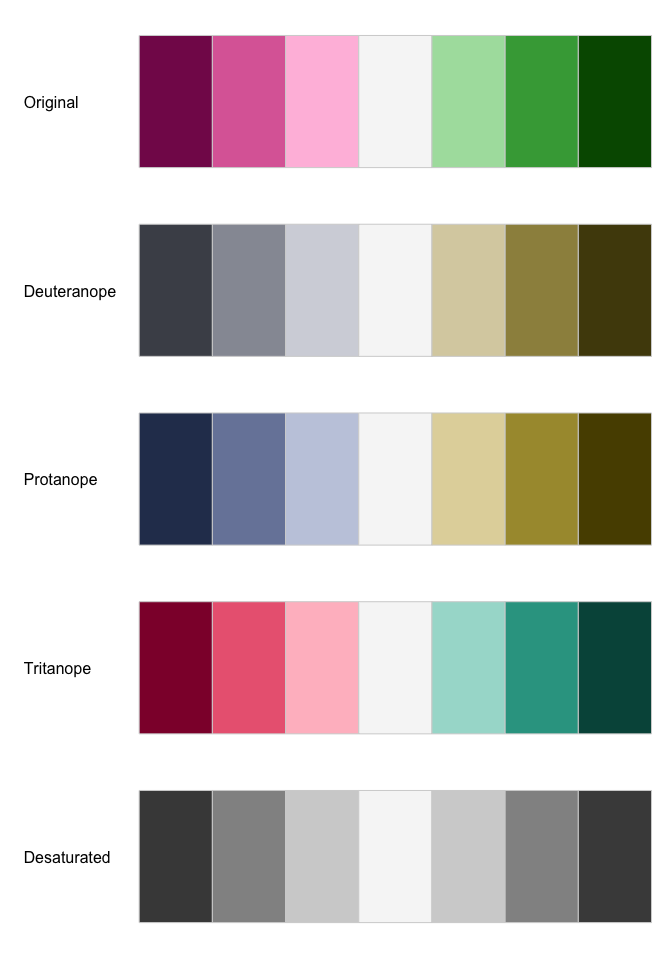

In [ ]:
swatchplot(diverging_hcl(7, 'Red-Green'), cvd = TRUE)

## References

Franconeri, Steven L., Lace M. Padilla, Priti Shah, Jeffrey M. Zacks,
and Jessica Hullman. 2021. “The Science of Visual Data Communication:
What Works.” *Psychological Science in the Public Interest* 22 (3):
110–61. <https://doi.org/10.1177/15291006211051956>.